## Анализ базы вакансий сайта hh.ru для аналитиков данных и бизнес-аналитиков

**Данные:**

Получены данные с сайта вакансий API hh.ru - это
две таблицы с вакансиями для аналитиков данных (DA) и бизнес-аналитиков (BA).

**Цели проекта:**

1.   Выявить различия в предлагаемых вакансиях для DA и BА.
2.   Выяснить, какими навыками должен обладать идеальный кандидат на должности DA и BА для различных уровней.
3.   Определить типичное место работы для DА и BА.






**Загрузка и открытие файлов с данными, загрузка библиотек**

In [1]:
# Загрузка библиотек

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Загрузка данных
try:
  url1 = 'https://drive.google.com/uc?export=download&id=1V3lvyGs8nEKM0Xm8F78qtIW-bpCsJfRn'
  url2 = 'https://drive.google.com/uc?export=download&id=1w_ljPgWjvIKVSXyHfXXuJgOQ-vmTKj88'
  # Чтение файлов Excel с помощью pandas
  vacancies_ba = pd.read_excel(url1)
  vacancies_da = pd.read_excel(url2)
  print("Файлы считаны")
except:
  print('Проблема')

  pd.set_option('display.float_format', '{:,.2f}'.format)

Файлы считаны


In [3]:
# Выводим 5 первых строк данных таблицы с вакансиями BA
vacancies_ba.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,77538397,Бизнес-аналитик,2024-03-27 09:32:37,https://hh.ru/vacancy/77538397,Открытая,Спортмастер,"Компания «СПОРТМАСТЕР», Офис",Москва,Junior+ (1-3 years),"['Аналитическое мышление', 'Business Studio', ...",Полный день,Полная занятость,«спортмастер» — это международный спортивный р...,спортмастер международный спортивный ритейлер ...,NaN,NaN,ЗП не указана,"MS Visio, Business Studio, MS PowerPoint, Опти...",NaN,"Документация, Аналитическое мышление"
1,79582672,Бизнес-аналитик / Системный аналитик (продукто...,2024-03-22 16:41:24,https://hh.ru/vacancy/79582672,Открытая,Первая Форма,NaN,Санкт-Петербург,Middle (3-6 years),"['Документация', 'Коммуникация']",Удаленная работа,Полная занятость,"рассмотрим кандидатов со всех регионов рф, гот...",рассматривать кандидат весь регион рф готовый ...,NaN,NaN,ЗП не указана,NaN,NaN,"Коммуникация, Документация"
2,80597746,Бизнес-аналитик 1С,2024-03-18 09:39:53,https://hh.ru/vacancy/80597746,Открытая,Газпром нефть,NaN,Санкт-Петербург,Junior (no experince),"['Управление проектами', 'Разработка техническ...",Полный день,Полная занятость,мы – команда «газпромнефть – цифровые решения»...,команда газпромнефть цифровой решение часть ит...,NaN,NaN,ЗП не указана,"Управление проектами, Разработка технических з...",NaN,Документация
3,81519791,Бизнес-аналитик ЛИС (лабораторной информационн...,2024-03-19 07:18:50,https://hh.ru/vacancy/81519791,Открытая,MedmaGroup,NaN,Екатеринбург,Junior+ (1-3 years),['Аналитическое мышление'],Полный день,Полная занятость,группа медицинских компаний &quot;медма&quot; ...,группа медицинский компания quot медма quot об...,NaN,NaN,ЗП не указана,NaN,NaN,Аналитическое мышление
4,81862636,Аналитик бизнес-процессов,2024-03-18 10:51:56,https://hh.ru/vacancy/81862636,Открытая,Главгосэкспертиза России,NaN,Москва,Junior+ (1-3 years),['Документация'],Удаленная работа,Полная занятость,главгосэкспертиза россии – драйвер цифровой тр...,главгосэкспертиза россия драйвер цифровой тран...,NaN,NaN,ЗП не указана,NaN,NaN,Документация


In [4]:
# Выводим 5 первых строк данных таблицы с вакансиями DA
vacancies_da.head()

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,77320677,Управляющий эксперт по аналитике данных,2024-03-18 19:39:33,https://hh.ru/vacancy/77320677,Открытая,ПСБ (ПАО «Промсвязьбанк»),"ПАО «Промсвязьбанк», ИТ",Москва,Middle (3-6 years),"['Бизнес-анализ', 'Анализ бизнес показателей',...",Полный день,Полная занятость,на масштабный проект по созданию единого корпо...,масштабный проект создание единый корпоративны...,NaN,NaN,ЗП не указана,"Финансовый анализ, Бизнес-анализ, Финансовая о...",NaN,Документация
1,77963716,Системный аналитик (взаимодействие между абоне...,2024-03-17 14:20:13,https://hh.ru/vacancy/77963716,Открытая,Яковлев,NaN,Москва,Junior+ (1-3 years),"['Apache, PHP, MySQL', 'Ethernet IEEE 802.3', ...",Полный день,Полная занятость,системный аналитик (инф. взаимодействие между ...,системный аналитик инф взаимодействие абонент ...,NaN,NaN,ЗП не указана,"ICD, AFDX, Excel, макросы VBA, Python, Etherne...",NaN,NaN
2,79889558,Аналитик данных в группу управления метаданным...,2024-03-16 14:48:58,https://hh.ru/vacancy/79889558,Открытая,МТС,"«МТС», Digital",Москва,Junior+ (1-3 years),"['Data Catalog', 'Data Governance', 'DMBOK DAM...",Полный день,Полная занятость,мтс – это мультисервисная цифровая экосистема....,мтс мультисервисный цифровой экосистема создав...,NaN,NaN,ЗП не указана,"Data Catalog, DMBOK DAMA, Business Glossary, D...",NaN,NaN
3,82901165,DATA-аналитик,2024-03-25 10:33:57,https://hh.ru/vacancy/82901165,Открытая,ЭлРос,NaN,Владимир,Junior+ (1-3 years),"['Spark', 'Data Analysis', 'Теория вероятносте...",Полный день,Полная занятость,наши преимущества: аккредитованная ит-компан...,наш преимущество аккредитовать ита компания си...,NaN,NaN,ЗП не указана,"Python, Математическая статистика, SQL, Spark,...",NaN,NaN
4,85598149,Аналитик данных (BI),2024-03-27 09:08:54,https://hh.ru/vacancy/85598149,Открытая,EVYAP International Russia,NaN,Москва,Junior+ (1-3 years),"['MS Access', 'Управление проектами', 'Olap (o...",Полный день,Полная занятость,"evyap rus – международная fmcg компания, произ...",evyap rus международный fmcg компания производ...,NaN,NaN,ЗП не указана,"Business Intelligence Systems, MS Excel, MS Ac...",NaN,Документация


**Описание данных:**

*   id — уникальный номер вакансии;
*   name — название вакансии;
*   published_at — дата размещения вакансии;
*   alternate_url — ссылка на вакансию;
*   type — тип вакансии (открытая/закрытая);
*   employer — наниматель;
*   department — подразделение нанимателя;
*   area — расположение офиса нанимателя;
*   experience — требуемый опыт работы;
*   key_skills — ключевые навыки;
*   schedule — график работы;
*   employment — тип занятости;
*   description и description_lemmatized — описание вакансии;
*   salary_from — зарплата "от";
*   salary_to — зарплата "до";
*   salary_bin — зарплатная вилка;
*   key_skills_from_key_skills_field — ключевые навыки из поля "key_skills" и описания вакансии;
*   hard_skills_from_description — профессиональные навыки;
*   soft_skills_from_description — личные навыки.















##Предобработка данных

**Удаление ненужных столбцов**

Продублируем датасет и будем работать уже с нужными нам столбцами. Удалим столбцы:ссылка на вакансию (не пригодятся); тип вакансии (данные только открытых вакансий); ключевые навыки (при выгрузке значения этого поля перешли в поле "key_skills_from_key_skills_field" вместе с ключевыми навыками из описания вакансии); столбцы с описанием вакансий (были задействованы при создании столбцов "key_skills_from_key_skills_field", "hard_skills_from_description", "soft_skills_from_description").

In [5]:
# Дублируем датасеты и удаляем ненужные столбцы
ba = vacancies_ba.drop(columns=['alternate_url', 'type', 'key_skills', 'description', 'description_lemmatized'])
da = vacancies_da.drop(columns=['alternate_url', 'type', 'key_skills', 'description', 'description_lemmatized'])

In [6]:
# Проверяем
ba.head()

,id,name,published_at,employer,department,area,experience,schedule,employment,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,77538397,Бизнес-аналитик,2024-03-27 09:32:37,Спортмастер,"Компания «СПОРТМАСТЕР», Офис",Москва,Junior+ (1-3 years),Полный день,Полная занятость,NaN,NaN,ЗП не указана,"MS Visio, Business Studio, MS PowerPoint, Опти...",NaN,"Документация, Аналитическое мышление"
1,79582672,Бизнес-аналитик / Системный аналитик (продукто...,2024-03-22 16:41:24,Первая Форма,NaN,Санкт-Петербург,Middle (3-6 years),Удаленная работа,Полная занятость,NaN,NaN,ЗП не указана,NaN,NaN,"Коммуникация, Документация"
2,80597746,Бизнес-аналитик 1С,2024-03-18 09:39:53,Газпром нефть,NaN,Санкт-Петербург,Junior (no experince),Полный день,Полная занятость,NaN,NaN,ЗП не указана,"Управление проектами, Разработка технических з...",NaN,Документация
3,81519791,Бизнес-аналитик ЛИС (лабораторной информационн...,2024-03-19 07:18:50,MedmaGroup,NaN,Екатеринбург,Junior+ (1-3 years),Полный день,Полная занятость,NaN,NaN,ЗП не указана,NaN,NaN,Аналитическое мышление
4,81862636,Аналитик бизнес-процессов,2024-03-18 10:51:56,Главгосэкспертиза России,NaN,Москва,Junior+ (1-3 years),Удаленная работа,Полная занятость,NaN,NaN,ЗП не указана,NaN,NaN,Документация


In [7]:
# Проверяем
da.head()

,id,name,published_at,employer,department,area,experience,schedule,employment,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,77320677,Управляющий эксперт по аналитике данных,2024-03-18 19:39:33,ПСБ (ПАО «Промсвязьбанк»),"ПАО «Промсвязьбанк», ИТ",Москва,Middle (3-6 years),Полный день,Полная занятость,NaN,NaN,ЗП не указана,"Финансовый анализ, Бизнес-анализ, Финансовая о...",NaN,Документация
1,77963716,Системный аналитик (взаимодействие между абоне...,2024-03-17 14:20:13,Яковлев,NaN,Москва,Junior+ (1-3 years),Полный день,Полная занятость,NaN,NaN,ЗП не указана,"ICD, AFDX, Excel, макросы VBA, Python, Etherne...",NaN,NaN
2,79889558,Аналитик данных в группу управления метаданным...,2024-03-16 14:48:58,МТС,"«МТС», Digital",Москва,Junior+ (1-3 years),Полный день,Полная занятость,NaN,NaN,ЗП не указана,"Data Catalog, DMBOK DAMA, Business Glossary, D...",NaN,NaN
3,82901165,DATA-аналитик,2024-03-25 10:33:57,ЭлРос,NaN,Владимир,Junior+ (1-3 years),Полный день,Полная занятость,NaN,NaN,ЗП не указана,"Python, Математическая статистика, SQL, Spark,...",NaN,NaN
4,85598149,Аналитик данных (BI),2024-03-27 09:08:54,EVYAP International Russia,NaN,Москва,Junior+ (1-3 years),Полный день,Полная занятость,NaN,NaN,ЗП не указана,"Business Intelligence Systems, MS Excel, MS Ac...",NaN,Документация


**Смотрим общую информацию по датасету DA**

In [8]:
# Смотрим информацию по датасету
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                417 non-null    int64         
 1   name                              417 non-null    object        
 2   published_at                      417 non-null    datetime64[ns]
 3   employer                          417 non-null    object        
 4   department                        137 non-null    object        
 5   area                              417 non-null    object        
 6   experience                        417 non-null    object        
 7   schedule                          417 non-null    object        
 8   employment                        417 non-null    object        
 9   salary_from                       57 non-null     float64       
 10  salary_to                         30 non-null     

Вакансий в датасете DA всего 417. Типы данных в столбцах корректны.

*Посмотрим на пропуски в столбцах*

In [9]:
# Сохраним в переменной total_nan долевое соотношение пропущенных значений по столбцам
total_nan = da.isna().mean().round(3)

In [10]:
# Умножим значения переменной total_nan на 100
total_nan = total_nan*100
total_nan

id                                   0.0
name                                 0.0
published_at                         0.0
employer                             0.0
department                          67.1
area                                 0.0
experience                           0.0
schedule                             0.0
employment                           0.0
salary_from                         86.3
salary_to                           92.8
salary_bin                           0.0
key_skills_from_key_skills_field    43.2
hard_skills_from_description        78.2
soft_skills_from_description        67.6
dtype: float64

67.1% пропусков в "department" (не все компании указывают подразделение). 86.3% и 92.8% пропусков в зарплатных столбцах (многие компании зарплату обсуждают индивидуально с кандидатом). Большое количество пропусков в столбцах с навыками (их мы рассмотрим далее).

*Посмотрим на дубликаты в столбцах*

In [11]:
# Смотрим количество дубликатов
da.duplicated().sum()

0

Дубликаты не обнаружены

*Посмотрим на диапазон размещения вакансий в датасете*

In [12]:
# Смотрим на самую раннюю дату размещения
da['published_at'].min()

Timestamp('2024-03-12 21:40:27')

In [13]:
# Смотрим на самую позднюю дату размещения
da['published_at'].max()

Timestamp('2024-03-31 22:20:48')

Данные вакансий в датасете с 12 марта 2024 года по 31 марта 2024 года

*Посмотрим на количество уникальных значений*

In [14]:
# Смотрим количество уникальных значений в столбце name
da['name'].value_counts()

name
Аналитик данных                                           70
Data Analyst                                              13
Data Strategy Analyst                                      6
Дата аналитик (Data Scientist)                             5
Младший аналитик данных                                    5
                                                          ..
Data quality analyst                                       1
Аналитик данных (Senior/Middle)                            1
Системный аналитик модели ядра хранилища данных            1
Аналитик данных / Инженер по качеству данных               1
Data Analyst (Analytical Support Team) (Ru + En) JEDai     1
Name: count, Length: 280, dtype: int64

Больше всего вакансий по запросу "Аналитик данных" - 70.

In [15]:
# Смотрим количество уникальных значений в столбце employer
da['employer'].value_counts()

employer
СБЕР                         65
МТС                          13
Т1                           11
WILDBERRIES                   8
Axenix (ранее Accenture)      7
                             ..
Тануки, японский ресторан     1
D Innovate Group              1
Таймлайн                      1
Почта Банк                    1
JEDai                         1
Name: count, Length: 232, dtype: int64

Больше всего вакансий размещено от компании "СБЕР" - 65

In [16]:
# Смотрим количество уникальных значений в столбце area
da['area'].value_counts()

area
Москва                          293
Санкт-Петербург                  29
Нижний Новгород                   9
Краснодар                         8
Екатеринбург                      8
Казань                            7
Новосибирск                       6
Владивосток                       6
Воронеж                           3
Тюмень                            3
Иваново (Ивановская область)      3
Ростов-на-Дону                    3
Томск                             2
Самара                            2
Владимир                          2
Тверь                             2
Иркутск                           2
Челябинск                         2
Горно-Алтайск                     2
Майкоп                            1
Железнодорожный                   1
Байбек                            1
Якутск                            1
Тольятти                          1
Ижевск                            1
Набережные Челны                  1
Липецк                            1
Златоуст               

Больше всего вакансий размещено в г. Москва - 293

In [17]:
# Смотрим количество уникальных значений в столбце experience
da['experience'].value_counts()

experience
Junior+ (1-3 years)      243
Middle (3-6 years)       137
Junior (no experince)     36
Senior (6+ years)          1
Name: count, dtype: int64

Больше всего требуются Junior+, с опытом работы 1-3 года (243 вакансии) и Middle,  с опытом 3-6 лет (137 вакансий).

In [18]:
# Смотрим количество уникальных значений в столбце schedule
da['schedule'].value_counts()

schedule
Полный день         344
Удаленная работа     64
Гибкий график         7
Сменный график        2
Name: count, dtype: int64

Больше всего вакансий с полным рабочим днем - 344

In [19]:
# Смотрим количество уникальных значений в столбце employment
da['employment'].value_counts()

employment
Полная занятость       408
Частичная занятость      4
Стажировка               4
Проектная работа         1
Name: count, dtype: int64

Больше всего вакансий с полной занятостью - 408

In [20]:
# Смотрим количество уникальных значений в столбце salary_bin
da['salary_bin'].value_counts()

salary_bin
ЗП не указана                387
Больше 300 тысяч              11
От 100 тысяч до 200 тысяч      8
Меньше 100 тысяч               6
От 200 тысяч до 300 тысяч      5
Name: count, dtype: int64

У 387 вакансий зарплата не указана

**Смотрим общую информацию по датасету BA**

In [21]:
# Смотрим информацию по датасету
ba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1011 non-null   int64         
 1   name                              1011 non-null   object        
 2   published_at                      1011 non-null   datetime64[ns]
 3   employer                          1011 non-null   object        
 4   department                        210 non-null    object        
 5   area                              1011 non-null   object        
 6   experience                        1011 non-null   object        
 7   schedule                          1011 non-null   object        
 8   employment                        1011 non-null   object        
 9   salary_from                       172 non-null    float64       
 10  salary_to                         132 non-null  

Вакансий в датасете BA всего 1011. Типы данных в столбцах корректны.

*Посмотрим на пропуски в столбцах*

In [22]:
# Сохраним в переменной total_nan долевое соотношение пропущенных значений по столбцам
total_nan = ba.isna().mean().round(3)

In [23]:
# Умножим значения переменной total_nan на 100
total_nan = total_nan*100
total_nan

id                                   0.0
name                                 0.0
published_at                         0.0
employer                             0.0
department                          79.2
area                                 0.0
experience                           0.0
schedule                             0.0
employment                           0.0
salary_from                         83.0
salary_to                           86.9
salary_bin                           0.0
key_skills_from_key_skills_field    44.0
hard_skills_from_description        83.5
soft_skills_from_description        38.9
dtype: float64

79.2% пропусков в "department" (не все компании указывают подразделение). 83% и 86.9% пропусков в зарплатных столбцах (многие компании зарплату обсуждают индивидуально с кандидатом). Большое количество пропусков в столбцах с навыками (их мы рассмотрим далее).

*Посмотрим на дубликаты в столбцах*

In [24]:
# Смотрим количество дубликатов
ba.duplicated().sum()

0

Дубликаты не обнаружены

*Посмотрим на диапазон размещения вакансий в датасете*

In [25]:
# Смотрим на самую раннюю дату размещения
ba['published_at'].min()

Timestamp('2024-03-12 23:44:07')

In [26]:
# Смотрим на самую позднюю дату размещения
ba['published_at'].max()

Timestamp('2024-03-31 18:20:38')

Данные вакансий в датасете с 12 марта 2024 года по 31 марта 2024 года

*Посмотрим на количество уникальных значений*

In [27]:
# Смотрим количество уникальных значений в столбце name
ba['name'].value_counts()

name
Бизнес-аналитик                                                                   245
Аналитик бизнес-процессов                                                          46
Ведущий бизнес-аналитик                                                            32
Бизнес-аналитик 1С                                                                 17
Бизнес аналитик                                                                     9
                                                                                 ... 
Бизнес аналитик (сфера культуры)                                                    1
Бизнес-аналитик "Общекредитные сервисы"                                             1
Технолог (Бизнес-аналитик)                                                          1
Бизнес-аналитик (развитие централизованных сервисов обслуживания клиентов КИБ)      1
Бизнес-аналитик в области e-commerce                                                1
Name: count, Length: 544, dtype: int64

Больше всего вакансий по запросу "Бизнес аналитик" - 245.

In [28]:
# Смотрим количество уникальных значений в столбце employer
ba['employer'].value_counts()

employer
СБЕР                      38
МАГНИТ, Розничная сеть    27
Банк ВТБ (ПАО)            21
Т1                        18
Комус                     13
                          ..
Аквион                     1
РБК                        1
ГенКлауд                   1
Медиалогия                 1
AZNResearch                1
Name: count, Length: 550, dtype: int64

Больше всего вакансий размещено от компаний: "СБЕР"- 38; "Магнит" - 27; ВТБ - 21

In [29]:
# Смотрим количество уникальных значений в столбце area
ba['area'].value_counts()

area
Москва             601
Санкт-Петербург    110
Екатеринбург        28
Нижний Новгород     25
Казань              23
                  ... 
Магнитогорск         1
Сургут               1
Южно-Сахалинск       1
Бронницы             1
Артем                1
Name: count, Length: 83, dtype: int64

Больше всего вакансий размещено в г. Москва - 601 и в г. Санкт-Петербург - 110.

In [30]:
# Смотрим количество уникальных значений в столбце experience
ba['experience'].value_counts()

experience
Junior+ (1-3 years)      510
Middle (3-6 years)       426
Junior (no experince)     59
Senior (6+ years)         16
Name: count, dtype: int64

Больше всего требуются Junior+, с опытом работы 1-3 года (510 вакансии) и Middle, с опытом 3-6 лет (426 вакансий).

In [31]:
# Смотрим количество уникальных значений в столбце schedule
ba['schedule'].value_counts()

schedule
Полный день         799
Удаленная работа    181
Гибкий график        30
Сменный график        1
Name: count, dtype: int64

Больше всего вакансий с полным рабочим днем - 799 и удаленной работой - 181

In [32]:
# Смотрим количество уникальных значений в столбце employment
ba['employment'].value_counts()

employment
Полная занятость       990
Стажировка              16
Проектная работа         3
Частичная занятость      2
Name: count, dtype: int64

Больше всего вакансий с полной занятостью - 990

In [33]:
# Смотрим количество уникальных значений в столбце salary_bin
ba['salary_bin'].value_counts()

salary_bin
ЗП не указана                879
От 100 тысяч до 200 тысяч     60
От 200 тысяч до 300 тысяч     35
Меньше 100 тысяч              28
Больше 300 тысяч               9
Name: count, dtype: int64

У 879 вакансий зарплата не указана

**Промежуточные выводы по датасетам**

*Вывод по DA:*

*   Вакансий в датасете DA всего 417. Типы данных в столбцах корректны;
*   67.1% пропусков в "department" (не все компании указывают подразделение). 86.3% и 92.8% пропусков в зарплатных столбцах (многие компании зарплату обсуждают индивидуально с кандидатом). Большое количество пропусков в столбцах с навыками;
*   Дубликаты не обнаружены;
*   Данные вакансий в датасете с 12 марта 2024 года по 31 марта 2024 года;
*   Больше всего вакансий по запросу "Аналитик данных" - 70;
*   Больше всего вакансий размещено от компании "СБЕР" - 65;
*   Больше всего вакансий размещено в г. Москва - 293;
*   Больше всего требуются Junior+, с опытом работы 1-3 года (243 вакансии) и Middle, с опытом 3-6 лет (137 вакансий);
*   Больше всего вакансий с полным рабочим днем - 344;
*   Больше всего вакансий с полной занятостью - 408;
*   У 387 вакансий зарплата не указана.





*Вывод по BA:*

*   Вакансий в датасете BA всего 1011. Типы данных в столбцах корректны;
*   79.2% пропусков в "department" (не все компании указывают подразделение). 83% и 86.9% пропусков в зарплатных столбцах (многие компании зарплату обсуждают индивидуально с кандидатом). Большое количество пропусков в столбцах с навыками;
*   Дубликаты не обнаружены;
*   Данные вакансий в датасете с 12 марта 2024 года по 31 марта 2024 года;
*   Больше всего вакансий по запросу "Бизнес аналитик" - 245;
*   Больше всего вакансий размещено от компаний: "СБЕР"- 38; "Магнит" - 27; ВТБ - 21;
*   Больше всего вакансий размещено в г. Москва - 601 и в г. Санкт-Петербург - 110;
*   Больше всего требуются Junior+, с опытом работы 1-3 года (510 вакансии) и Middle, с опытом 3-6 лет (426 вакансий);
*   Больше всего вакансий с полным рабочим днем - 799 и удаленной работой - 181;
*   Больше всего вакансий с полной занятостью - 990;
*   У 879 вакансий зарплата не указана.

**Работа с данными**

*Работа со столбцом experience*

Для удобства и не для загромождения графиков в дальнейшем, уберем значения в скобках и приведем к нижнему регистру

In [34]:
# Приводим к нижнему регистру и убираем значения в скобках в датасете DA
da['experience'] = da['experience'].apply(lambda x: x.lower().split(' ')[0])

In [35]:
# Проверяем
da['experience'].head()

0     middle
1    junior+
2    junior+
3    junior+
4    junior+
Name: experience, dtype: object

In [36]:
# Приводим к нижнему регистру и убираем значения в скобках в датасете BA
ba['experience'] = ba['experience'].apply(lambda x: x.lower().split(' ')[0])

In [37]:
# Проверяем
ba['experience'].head()

0    junior+
1     middle
2     junior
3    junior+
4    junior+
Name: experience, dtype: object

**Работа с пропусками**

Заполним пропущенные значения в столбцах department, salary_from, salary_to заглушками: "0" и "неизвестно"

In [38]:
# Заполним пропуски в столбцах salary_from, salary_to нолями
da[['salary_from','salary_to']] = da[['salary_from','salary_to']].fillna(0)

In [39]:
# Проверяем
da[['salary_from','salary_to']]

,salary_from,salary_to
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
412,0.0,0.0
413,0.0,0.0
414,0.0,0.0
415,0.0,93750.0


In [40]:
# Заполним пропуски в столбце department "неизвестно"
da['department'] = \
da['department'].fillna('неизвестно')

In [41]:
# Уберем пропуски в столбцах key_skills_from_key_skills_field, hard_skills_from_description, soft_skills_from_description
da[['key_skills_from_key_skills_field', 'hard_skills_from_description', 'soft_skills_from_description']] = \
da[['key_skills_from_key_skills_field', 'hard_skills_from_description', 'soft_skills_from_description']].fillna(' ')

In [42]:
# Заполним пропуски в столбцах salary_from, salary_to нолями
ba[['salary_from','salary_to']] = ba[['salary_from','salary_to']].fillna(0)

In [43]:
# Проверяем
ba[['salary_from','salary_to']]

,salary_from,salary_to
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
1006,0.0,0.0
1007,130000.0,150000.0
1008,0.0,0.0
1009,0.0,0.0


In [44]:
# Заполним пропуски в столбце department "неизвестно"
ba['department'] = \
ba['department'].fillna('неизвестно')

In [45]:
# Уберем пропуски в столбцах key_skills_from_key_skills_field, hard_skills_from_description, soft_skills_from_description
ba[['key_skills_from_key_skills_field', 'hard_skills_from_description', 'soft_skills_from_description']] = \
ba[['key_skills_from_key_skills_field', 'hard_skills_from_description', 'soft_skills_from_description']].fillna(' ')

**Работа с зарплатными столбцами**

Рассмотрим столбцы с зарплатой salary_from, salary_to, salary_bin. Сделаем срез, где в salary_bin зарплатная вилка указана, чтобы посмотреть какие значения будут принимать остальные столбцы.

In [46]:
# Сначала посмотрим при условии, что "З.П от" не равна нулю
(da[['salary_from','salary_to', 'salary_bin']].query('(salary_bin != "ЗП не указана") & (salary_from != 0)').head(10))

,salary_from,salary_to,salary_bin
19,85000.0,85000.0,Меньше 100 тысяч
63,50000.0,125000.0,От 100 тысяч до 200 тысяч
77,200000.0,300000.0,Больше 300 тысяч
78,200000.0,300000.0,Больше 300 тысяч
79,200000.0,300000.0,Больше 300 тысяч
80,200000.0,300000.0,Больше 300 тысяч
81,200000.0,300000.0,Больше 300 тысяч
122,28940.0,36175.0,Меньше 100 тысяч
145,50000.0,85000.0,Меньше 100 тысяч
157,150000.0,250000.0,От 200 тысяч до 300 тысяч


In [47]:
# Теперь при условии, что "З.П" равна нулю
(da[['salary_from','salary_to', 'salary_bin']].query('(salary_bin != "ЗП не указана") & (salary_from == 0)').head(10))

,salary_from,salary_to,salary_bin
113,0.0,100000.0,От 100 тысяч до 200 тысяч
114,0.0,218400.0,От 200 тысяч до 300 тысяч
119,0.0,200000.0,От 200 тысяч до 300 тысяч
166,0.0,137000.0,От 100 тысяч до 200 тысяч
224,0.0,400000.0,Больше 300 тысяч
228,0.0,150000.0,От 100 тысяч до 200 тысяч
261,0.0,140000.0,От 100 тысяч до 200 тысяч
330,0.0,100000.0,От 100 тысяч до 200 тысяч
401,0.0,150000.0,От 100 тысяч до 200 тысяч
406,0.0,218400.0,От 200 тысяч до 300 тысяч


Из получившихся результатов можно сделать вывод, что salary_bin отталкивается от сведений, внесенных в столбец salary_to. Теперь посмотрим какие значения буду принимать столбцы при salary_bin, в которой "З.П не указана".

In [48]:
# Смотрим значения столбцов при salary_bin, в которой "З.П не указана"
(da[['salary_from','salary_to', 'salary_bin']].query('(salary_bin == "ЗП не указана") & (salary_from > 0)'))

,salary_from,salary_to,salary_bin
6,100000.0,0.0,ЗП не указана
7,100000.0,0.0,ЗП не указана
20,70000.0,0.0,ЗП не указана
25,190000.0,0.0,ЗП не указана
45,180000.0,0.0,ЗП не указана
52,40050.0,0.0,ЗП не указана
58,60000.0,0.0,ЗП не указана
66,120000.0,0.0,ЗП не указана
69,70000.0,0.0,ЗП не указана
89,120000.0,0.0,ЗП не указана


In [49]:
# Смотрим, есть ли значения в salary_bin, равные "ЗП не указана", а в salary_to есть значения больше нуля
(da[['salary_from','salary_to', 'salary_bin']].query('(salary_bin == "ЗП не указана") & (salary_to > 0)'))

,salary_from,salary_to,salary_bin


Очевидно, что хоть в salary_from и есть значения З.П, но категория для них все равно определилась как "ЗП не указана", из чего следует вывод, что определяющим является именно salary_to. При условиях, что salary_bin равно "ЗП не указана", а в salary_to есть значения больше нуля, видим, что таких значений нет. Поэтому заполним значения в столбцах таким образом: где salary_from больше нуля, а "salary_to" равна нулю, заполним salary_to значениями из salary_from, а salary_bin исправим соответсвующей категорией.

In [50]:
# Заполним значение столбца salary_to значениями столбца salary_from при условиях: salary_bin равно "ЗП не указана" и значение salary_from больше 0
da.loc[(da['salary_bin'] == "ЗП не указана") & (da['salary_from'] > 0) , 'salary_to'] = \
da.loc[(da['salary_bin'] == "ЗП не указана") & (da['salary_from'] > 0) , 'salary_from']

In [51]:
# По такому же принципу заполним в BA
ba.loc[(ba['salary_bin'] == "ЗП не указана") & (ba['salary_from'] > 0) , 'salary_to'] = \
ba.loc[(ba['salary_bin'] == "ЗП не указана") & (ba['salary_from'] > 0) , 'salary_from']

Категории будут следующие:

*   ЗП не указана;
*   Меньше 100 тысяч;
*   От 100 тысяч до 200 тысяч;
*   От 200 тысяч до 300 тысяч;
*   Больше 300 тысяч.







In [52]:
# Функция для распределения зарплат по категориям
def zp(salary):
    if 0 < salary < 100000:
        return 'Менее 100 тыс.'
    elif 100000 <= salary < 200000:
        return '100-200 тыс.'
    elif 200000 <= salary < 300000:
        return '200-300 тыс.'
    elif salary >= 300000:
        return 'Более 300 тыс.'
    else:
        return 'ЗП не указана'

In [53]:
# Заполняем salary_bin значениями по категориям
da['salary_bin'] = da['salary_to'].apply(zp)

In [54]:
# Проверяем
da.tail(15)

,id,name,published_at,employer,department,area,experience,schedule,employment,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
402,95794749,Аналитик данных,2024-03-29 13:51:45,Россельхозбанк,неизвестно,Иваново (Ивановская область),junior+,Полный день,Полная занятость,0.0,0.0,ЗП не указана,"Аналитическое мышление, MS SQL, Базы данных, А...",,
403,95796859,Middle Data Analyst (команда Digital Avatar),2024-03-29 14:15:04,СБЕР,Сбер для экспертов,Москва,junior+,Полный день,Полная занятость,0.0,0.0,ЗП не указана,,,
404,95799714,Аналитик данных,2024-03-29 14:46:47,Акира Оил,неизвестно,Москва,junior+,Удаленная работа,Полная занятость,120000.0,120000.0,100-200 тыс.,"Power Query, Power BI, 1С: Торговля, DAX, MS E...",,Документация
405,95801370,Аналитик данных IVR,2024-03-29 15:05:06,СБЕР,Сбер для экспертов,Турочак,junior+,Полный день,Частичная занятость,0.0,0.0,ЗП не указана,,,
406,95805024,Аналитик данных в отдел планирования и прогноз...,2024-03-29 15:40:23,"Бристоль, сеть магазинов",неизвестно,Москва,middle,Полный день,Полная занятость,0.0,218400.0,200-300 тыс.,,,
407,95806228,Аналитик данных по рискам,2024-03-29 15:55:13,Спортмастер,"Компания «СПОРТМАСТЕР», Офис",Москва,middle,Удаленная работа,Полная занятость,0.0,0.0,ЗП не указана,,,Проактивность
408,95809564,Дата аналитик / Data analyst (Кредитный потенц...,2024-03-29 16:32:03,СБЕР,Сбер для экспертов,Москва,middle,Полный день,Полная занятость,0.0,0.0,ЗП не указана,"Python, SQL, Базы данных",Pandas,
409,95812577,Middle Data Analyst,2024-03-29 17:15:10,СБЕР,Сбер для экспертов,Москва,junior+,Полный день,Полная занятость,0.0,0.0,ЗП не указана,,,
410,95813234,Стажер в Группу аналитики данных,2024-03-29 17:24:54,"БИОКАД, биотехнологическая компания",неизвестно,Санкт-Петербург,junior,Полный день,Стажировка,0.0,0.0,ЗП не указана,,Pandas,Документация
411,95813844,Аналитик больших данных (Data steward/Распоряд...,2024-03-29 17:33:40,АНО Проектно-аналитический центр Мосцифра,неизвестно,Москва,junior,Полный день,Полная занятость,0.0,0.0,ЗП не указана,,,"Коммуникация, Документация"


In [55]:
# Заполняем salary_bin значениями по категориям в BA
ba['salary_bin'] = ba['salary_to'].apply(zp)

In [56]:
# Проверяем
ba.tail(15)

,id,name,published_at,employer,department,area,experience,schedule,employment,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
996,95811977,Бизнес-аналитик/Процессный аналитик,2024-03-29 17:06:21,МТС,«МТС»,Москва,middle,Полный день,Полная занятость,0.0,0.0,ЗП не указана,,,"Документация, Аналитическое мышление"
997,95812489,Аналитик бизнес-процессов,2024-03-29 17:12:46,"МАГНИТ, Розничная сеть",неизвестно,Нижний Новгород,junior+,Удаленная работа,Полная занятость,0.0,0.0,ЗП не указана,"MS PowerPoint, MS Outlook, Подготовка презента...",,Документация
998,95812581,Аналитик бизнес-процессов,2024-03-29 17:15:14,"МАГНИТ, Розничная сеть",неизвестно,Москва,junior+,Удаленная работа,Полная занятость,0.0,0.0,ЗП не указана,"MS PowerPoint, MS Outlook, Подготовка презента...",,Документация
999,95812582,Аналитик бизнес-процессов,2024-03-29 17:15:14,"МАГНИТ, Розничная сеть",неизвестно,Санкт-Петербург,junior+,Удаленная работа,Полная занятость,0.0,0.0,ЗП не указана,"MS PowerPoint, MS Outlook, Подготовка презента...",,Документация
1000,95812583,Аналитик бизнес-процессов,2024-03-29 17:15:14,"МАГНИТ, Розничная сеть",неизвестно,Саратов,junior+,Удаленная работа,Полная занятость,0.0,0.0,ЗП не указана,"MS PowerPoint, MS Outlook, Подготовка презента...",,Документация
1001,95812584,Аналитик бизнес-процессов,2024-03-29 17:15:14,"МАГНИТ, Розничная сеть",неизвестно,Ярославль,junior+,Удаленная работа,Полная занятость,0.0,0.0,ЗП не указана,"MS PowerPoint, MS Outlook, Подготовка презента...",,Документация
1002,95812667,Аналитик бизнес-процессов,2024-03-29 17:17:36,"МАГНИТ, Розничная сеть",неизвестно,Краснодар,junior+,Полный день,Полная занятость,0.0,0.0,ЗП не указана,"MS PowerPoint, MS Outlook, Подготовка презента...",,Документация
1003,95812696,Бизнес-аналитик/помощник коммерческого директора,2024-03-29 17:18:33,Фахманн Руссланд,неизвестно,Рязань,junior+,Полный день,Полная занятость,0.0,60000.0,Менее 100 тыс.,"Бизнес-анализ, MS Excel, Планирование рабочего...",,Документация
1004,95813869,Бизнес-аналитик (Процессный-аналитик),2024-03-29 17:34:11,Экономика Москвы,неизвестно,Москва,middle,Полный день,Полная занятость,0.0,217000.0,200-300 тыс.,,,Документация
1005,95813986,Ведущий бизнес-аналитик,2024-03-29 17:37:31,Си Эс Си Лтд,неизвестно,Москва,middle,Полный день,Полная занятость,200000.0,200000.0,200-300 тыс.,,,


**Работа с навыками**

Создадим отдельный столбец со всеми навыками

In [57]:
def all_skills(df):

    # Создаем функцию для разделения навыков в каждой строчке
    def split_skills(dff, col):
        dff[col] = dff[col].str.lower().str.replace(' ', '_').str.replace(',_', ' ').str.split()

    # Применяем функцию ко всем столбцам с навыками
    split_skills(df, 'hard_skills_from_description')
    split_skills(df, 'soft_skills_from_description')
    split_skills(df, 'key_skills_from_key_skills_field')

    # Объединяем все навыки в один столбец
    df['key_skills_from_key_skills_field'] = \
    df['key_skills_from_key_skills_field'] + df['hard_skills_from_description'] + df['soft_skills_from_description']

    # Создаем датафрейм из индексов и навыков
    temp = pd.DataFrame(df['key_skills_from_key_skills_field'].explode())

    # Функция для объединения неявных дубликатов
    def imp_dups(row):
        if 'sql' in row:
            return 'sql '
        elif 'python' in row or 'pandas' in row or 'numpy' in row or 'matplotlib' in row or 'plotly' in row:
            return 'python '
        elif 'бизнес-анализ' in row or 'бизнес-аналитика' in row or 'business_analysis' in row:
            return 'business_analysis '
        elif 'data_analysis' in row or 'анализ_данных' in row:
            return 'data_analysis '
        elif 'баз' in row:
            'базы_данных '
        elif 'виз' in row or row == 'bi':
            return 'bi '
        elif 'power' in row and not 'point' in row:
            return 'power_bi '
        elif 'point' in row:
            return 'power_point '
        elif 'excel' in row:
            return 'excel '
        elif '1с' in row or '1c' in row:
            return '1С '
        elif 'spark' in row:
            return 'spark '
        elif 'olap' in row:
            return 'olap '
        else:
            return row + ' '

    # Создаем новый столбец и применяем функцию
    temp['new'] = temp['key_skills_from_key_skills_field'].apply(imp_dups)
    temp.loc[(temp['new'].isnull()), 'new'] = temp.loc[(temp['new'].isnull()), 'key_skills_from_key_skills_field']
    # Удаляем дубли по индексу и значению нового столбца
    temp = temp.reset_index().drop_duplicates(subset=['index', 'new'])
    # Собираем обратно под свой индекс все навыки вместе
    temp = temp.pivot_table(index='index', values='new', aggfunc='sum')
    # Обновляем наш столбец и переименовываем его
    df['key_skills_from_key_skills_field'] = temp['new']
    df = df.rename(columns={'key_skills_from_key_skills_field':'all_skills'})
    # Удаляем более ненужные нам столбцы
    df = df.drop(columns=['hard_skills_from_description', 'soft_skills_from_description'])

    return df

In [58]:
# Добавляем в датасет DA столбец all_skills
da = all_skills(da)

In [59]:
# Проверяем
da.head()

,id,name,published_at,employer,department,area,experience,schedule,employment,salary_from,salary_to,salary_bin,all_skills
0,77320677,Управляющий эксперт по аналитике данных,2024-03-18 19:39:33,ПСБ (ПАО «Промсвязьбанк»),"ПАО «Промсвязьбанк», ИТ",Москва,middle,Полный день,Полная занятость,0.0,0.0,ЗП не указана,финансовый_анализ business_analysis финансовая...
1,77963716,Системный аналитик (взаимодействие между абоне...,2024-03-17 14:20:13,Яковлев,неизвестно,Москва,junior+,Полный день,Полная занятость,0.0,0.0,ЗП не указана,icd afdx excel макросы_vba python ethernet_iee...
2,79889558,Аналитик данных в группу управления метаданным...,2024-03-16 14:48:58,МТС,"«МТС», Digital",Москва,junior+,Полный день,Полная занятость,0.0,0.0,ЗП не указана,data_catalog dmbok_dama business_glossary data...
3,82901165,DATA-аналитик,2024-03-25 10:33:57,ЭлРос,неизвестно,Владимир,junior+,Полный день,Полная занятость,0.0,0.0,ЗП не указана,python математическая_статистика sql spark had...
4,85598149,Аналитик данных (BI),2024-03-27 09:08:54,EVYAP International Russia,неизвестно,Москва,junior+,Полный день,Полная занятость,0.0,0.0,ЗП не указана,business_intelligence_systems excel ms_access ...


In [60]:
# Добавляем в датасет BA столбец all_skills
ba = all_skills(ba)

In [61]:
# Проверяем
ba.head()

,id,name,published_at,employer,department,area,experience,schedule,employment,salary_from,salary_to,salary_bin,all_skills
0,77538397,Бизнес-аналитик,2024-03-27 09:32:37,Спортмастер,"Компания «СПОРТМАСТЕР», Офис",Москва,junior+,Полный день,Полная занятость,0.0,0.0,ЗП не указана,ms_visio business_studio power_point оптимизац...
1,79582672,Бизнес-аналитик / Системный аналитик (продукто...,2024-03-22 16:41:24,Первая Форма,неизвестно,Санкт-Петербург,middle,Удаленная работа,Полная занятость,0.0,0.0,ЗП не указана,_ коммуникация документация
2,80597746,Бизнес-аналитик 1С,2024-03-18 09:39:53,Газпром нефть,неизвестно,Санкт-Петербург,junior,Полный день,Полная занятость,0.0,0.0,ЗП не указана,управление_проектами разработка_технических_за...
3,81519791,Бизнес-аналитик ЛИС (лабораторной информационн...,2024-03-19 07:18:50,MedmaGroup,неизвестно,Екатеринбург,junior+,Полный день,Полная занятость,0.0,0.0,ЗП не указана,_ аналитическое_мышление
4,81862636,Аналитик бизнес-процессов,2024-03-18 10:51:56,Главгосэкспертиза России,неизвестно,Москва,junior+,Удаленная работа,Полная занятость,0.0,0.0,ЗП не указана,_ документация


*Разделим все навыки на hard и софт*

In [62]:
# Создаем список уникальных софт навыков из исходника DA
st_d = (
    set(
        vacancies_da['soft_skills_from_description']
        .fillna(' ')
        .str.lower()
        .str.replace(' ', '_')
        .str.replace(',_', ' ')
        .str.split()
        .sum())
)

st_d.remove('_')
softs_d = list(st_d)

# Создаем список уникальных софт навыков из исходника BA
st_b = (
    set(
        vacancies_ba['soft_skills_from_description']
        .fillna(' ')
        .str.lower()
        .str.replace(' ', '_')
        .str.replace(',_', ' ')
        .str.split()
        .sum())
)

st_b.remove('_')
softs_b = list(st_b)

# Соединяем их, удаляем задвоения, и пополняем итоговый список дополнительными элементами
all_softs = softs_d + softs_b
all_softs = list(set(all_softs))
all_softs.extend(['грамот', 'перепис', 'людьми', 'лидер', 'многозадач', 'команд'])
all_softs

['тайм-менеджмент',
 'креативность',
 'критическое_мышление',
 'принятие_решений',
 'коммуникация',
 'переговоры',
 'решение_проблем',
 'лидерство',
 'эмпатия',
 'проактивность',
 'аналитическое_мышление',
 'адаптивность',
 'документация',
 'грамот',
 'перепис',
 'людьми',
 'лидер',
 'многозадач',
 'команд']

In [63]:
def separate_skills(df):

    # Разделяем все навыки построчно и создаем временный датафрейм
    temps = pd.DataFrame(df['all_skills'].fillna('_').str.split().explode())

    # Создаем функцию, которая будет проверять наличие навыка из списка в строке и присваивать значение "soft" при совпадении, в противном случае "hard"
    def check_skills(row):
        for i in all_softs:
            if i in row:
                return 'soft'
        return 'hard'

    # Применяем ее к новому столбцу
    temps['sk_type'] = temps['all_skills'].apply(check_skills)
    # Добавляем пробел ко всем навыкам в конце, чтобы при суммировании они не слиплись
    temps['all_skills'] = temps['all_skills'].apply(lambda x: ' ' + x)
    # Создаем сводную таблицу, собирая навыки обратно в одну ячейку, но уже с разделением по hard и soft
    temps = (temps
             .reset_index()
             .pivot_table(
                 index='index',
                 columns = 'sk_type',
                 values = 'all_skills',
                 aggfunc = 'sum')
             .fillna('_')
            )

    # Добавляем получившиеся столбцы в анализируемый датафрейм
    df['hard_skills'] = temps['hard']
    df['soft_skills'] = temps['soft']

    return df

In [64]:
# Применяем функцию к нашему датафрейму DA
da = separate_skills(da)

In [65]:
# Проверяем
da.head()

,id,name,published_at,employer,department,area,experience,schedule,employment,salary_from,salary_to,salary_bin,all_skills,hard_skills,soft_skills
0,77320677,Управляющий эксперт по аналитике данных,2024-03-18 19:39:33,ПСБ (ПАО «Промсвязьбанк»),"ПАО «Промсвязьбанк», ИТ",Москва,middle,Полный день,Полная занятость,0.0,0.0,ЗП не указана,финансовый_анализ business_analysis финансовая...,финансовый_анализ business_analysis финансова...,документация
1,77963716,Системный аналитик (взаимодействие между абоне...,2024-03-17 14:20:13,Яковлев,неизвестно,Москва,junior+,Полный день,Полная занятость,0.0,0.0,ЗП не указана,icd afdx excel макросы_vba python ethernet_iee...,icd afdx excel макросы_vba python ethernet_ie...,_
2,79889558,Аналитик данных в группу управления метаданным...,2024-03-16 14:48:58,МТС,"«МТС», Digital",Москва,junior+,Полный день,Полная занятость,0.0,0.0,ЗП не указана,data_catalog dmbok_dama business_glossary data...,data_catalog dmbok_dama business_glossary dat...,_
3,82901165,DATA-аналитик,2024-03-25 10:33:57,ЭлРос,неизвестно,Владимир,junior+,Полный день,Полная занятость,0.0,0.0,ЗП не указана,python математическая_статистика sql spark had...,python математическая_статистика sql spark ha...,_
4,85598149,Аналитик данных (BI),2024-03-27 09:08:54,EVYAP International Russia,неизвестно,Москва,junior+,Полный день,Полная занятость,0.0,0.0,ЗП не указана,business_intelligence_systems excel ms_access ...,business_intelligence_systems excel ms_access...,грамотная_речь работа_в_команде деловая_переп...


In [66]:
# Применяем функцию к нашему датафрейму BA
ba = separate_skills(ba)

In [67]:
# Проверяем
ba.head()

,id,name,published_at,employer,department,area,experience,schedule,employment,salary_from,salary_to,salary_bin,all_skills,hard_skills,soft_skills
0,77538397,Бизнес-аналитик,2024-03-27 09:32:37,Спортмастер,"Компания «СПОРТМАСТЕР», Офис",Москва,junior+,Полный день,Полная занятость,0.0,0.0,ЗП не указана,ms_visio business_studio power_point оптимизац...,ms_visio business_studio power_point оптимиза...,документация аналитическое_мышление
1,79582672,Бизнес-аналитик / Системный аналитик (продукто...,2024-03-22 16:41:24,Первая Форма,неизвестно,Санкт-Петербург,middle,Удаленная работа,Полная занятость,0.0,0.0,ЗП не указана,_ коммуникация документация,_,коммуникация документация
2,80597746,Бизнес-аналитик 1С,2024-03-18 09:39:53,Газпром нефть,неизвестно,Санкт-Петербург,junior,Полный день,Полная занятость,0.0,0.0,ЗП не указана,управление_проектами разработка_технических_за...,управление_проектами разработка_технических_з...,документация
3,81519791,Бизнес-аналитик ЛИС (лабораторной информационн...,2024-03-19 07:18:50,MedmaGroup,неизвестно,Екатеринбург,junior+,Полный день,Полная занятость,0.0,0.0,ЗП не указана,_ аналитическое_мышление,_,аналитическое_мышление
4,81862636,Аналитик бизнес-процессов,2024-03-18 10:51:56,Главгосэкспертиза России,неизвестно,Москва,junior+,Удаленная работа,Полная занятость,0.0,0.0,ЗП не указана,_ документация,_,документация


## Исследовательский анализ данных

**Уровень ЗП в зависимости от опыта**

In [68]:
# Смотрим какое процентное соотношение вакансий размещено без указания з.п в DA
(da.loc[(da['salary_bin'] == "ЗП не указана"), 'salary_bin'].count() / da['salary_bin'].count()*100).round(1)

83.7

In [69]:
# Смотрим какое процентное соотношение вакансий размещено без указания з.п в BA
(ba.loc[(ba['salary_bin'] == "ЗП не указана"), 'salary_bin'].count() / ba['salary_bin'].count()*100).round(1)

77.9

В размещенных вакансиях з.п не указана в DA - 83.7%, а в BA - 77.9%

Построим графики DA и BA, где посмотрим уровень з.п в зависимости от опыта

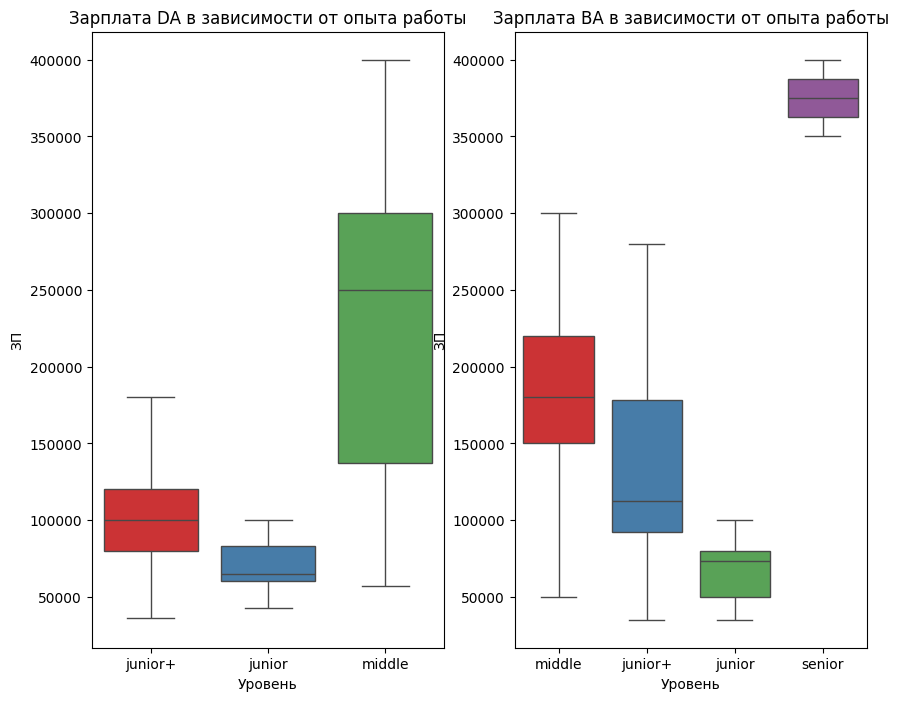

In [70]:
# В переменных zp1 и zp2 сохраним значения столбца salary_bin где указана зарплата для DA и BA соответственно
zp1 = da['salary_bin'] != "ЗП не указана"
zp2 = ba['salary_bin'] != "ЗП не указана"

plt.figure(figsize=(10, 8))

ax1=plt.subplot(1, 2, 1)

(sns.boxplot(
    data = da.loc[zp1],
    y = 'salary_to',
    x='experience',
    palette="Set1",
    showfliers=False,
    showmeans=False, ax=ax1)
    .set(title = 'Зарплата DA в зависимости от опыта работы',
         xlabel = 'Уровень',
         ylabel = 'ЗП'))

ax2=plt.subplot(1, 2, 2, sharey=ax1)

(sns.boxplot(
    data = ba.loc[zp2],
    y = 'salary_to',
    x='experience',
    palette="Set1",
    showfliers=False,
    showmeans=False, ax=ax2)
    .set(title = 'Зарплата BA в зависимости от опыта работы',
         xlabel = 'Уровень',
         ylabel = 'ЗП'))

plt.show()

Чем больше опыта, тем больше з.п. Все логично

**Топ основных hard и soft навыков**

Посмотрим какие навыки более присуще к DA и BA, для этого подготовим функцию для построения графиков.

In [71]:
def skills_hbars(df, exp):
    plt.figure(figsize=(5, 5))
    bar_colors = ['tab:red', 'tab:pink', 'tab:orange' , 'tab:blue', 'tab:green']

    ax1 = plt.subplot(2, 1, 1)
    ((pd.DataFrame(df.loc[df['experience'] == exp, 'soft_skills']
     .str.split()
     .explode())
     .query('soft_skills != "_"')['soft_skills']
     .value_counts(normalize=True)*100)
     .head()
     .sort_values(ascending=True)
     .plot(kind='barh',
           rot=0,
           grid=True,
           color=bar_colors,
           ax=ax1)
    )
    plt.title('Топ-5 soft навыков')
    plt.xlabel('Процент вакансий')

    ax2 = plt.subplot(2, 1, 2, sharex=ax1)
    ((pd.DataFrame(df.loc[df['experience'] == exp, 'hard_skills']
     .str.split()
     .explode())
     .query('hard_skills != "_"')['hard_skills']
     .value_counts(normalize=True)*100)
     .head()
     .sort_values(ascending=True)
     .plot(kind='barh',
           rot=0,
           grid=True,
           color=bar_colors,
           ax=ax2)
    )
    plt.title('Топ-5 hard навыков')
    plt.xlabel('Процент вакансий')

    plt.subplots_adjust(wspace=.15, hspace=.2)
    plt.show()

Применим функцию к датасету DA.

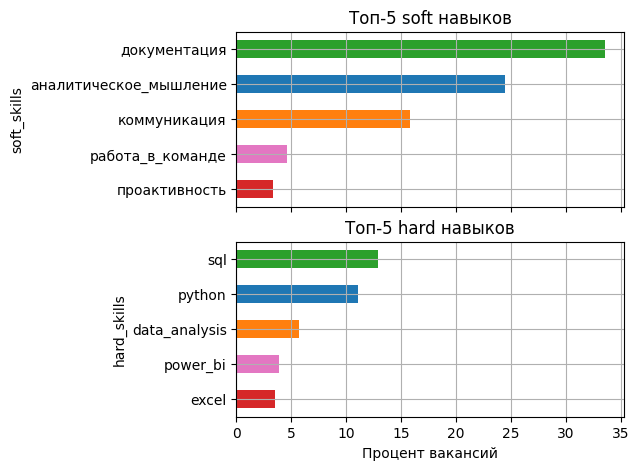

In [72]:
skills_hbars(da, da['experience'])

Применим функцию к датасету BA.

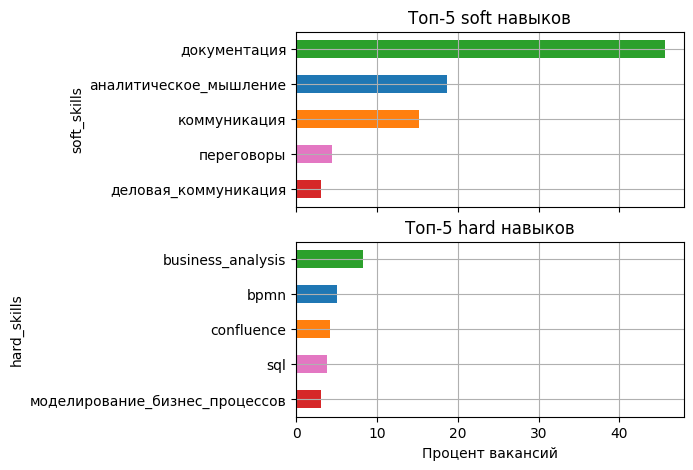

In [73]:
skills_hbars(ba, ba['experience'])

Судя по графикам основные soft навыки для DA и BA - это документация, аналитическое мышление и коммуникация. hard навыки у DA и BA совсем разные, единственное совпадение для них - это знание SQL. Для BA наиболее важный фактор - бизнес анализ, а для DA - языки программирования.

**Распределение вакансий, исходя из опыта работы**

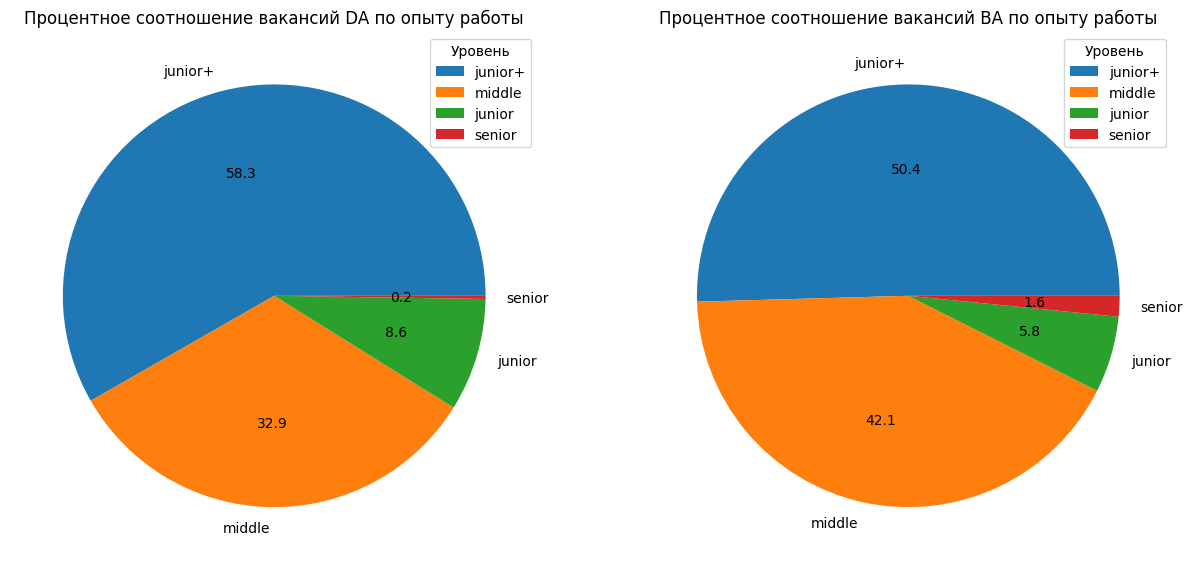

In [74]:
plt.figure(figsize=(15, 15))
ax1=plt.subplot(1, 2, 1)

(
    da
    .value_counts('experience')
    .plot(
        autopct='%.1f',
        kind='pie',
        title='Процентное соотношение вакансий DA по опыту работы',
        ax=ax1)
)
plt.legend(title='Уровень')
plt.ylabel('')


ax2=plt.subplot(1, 2, 2)

(
    ba
    .value_counts('experience')
    .plot(
        autopct='%.1f',
        kind='pie',
        title='Процентное соотношение вакансий BA по опыту работы',
        ax=ax2)
)
plt.legend(title='Уровень')
plt.ylabel('')
plt.show()

В DA позиции junior+ более востребованы, нежели в BA 58.3% и 50.4% соответственно. middle больше нужны в BA, чем в DA 42.1% и 32.9% соответственно. На junior и senior спрос одинаково не большой

**Распределение вакансий по территориальному расположению**

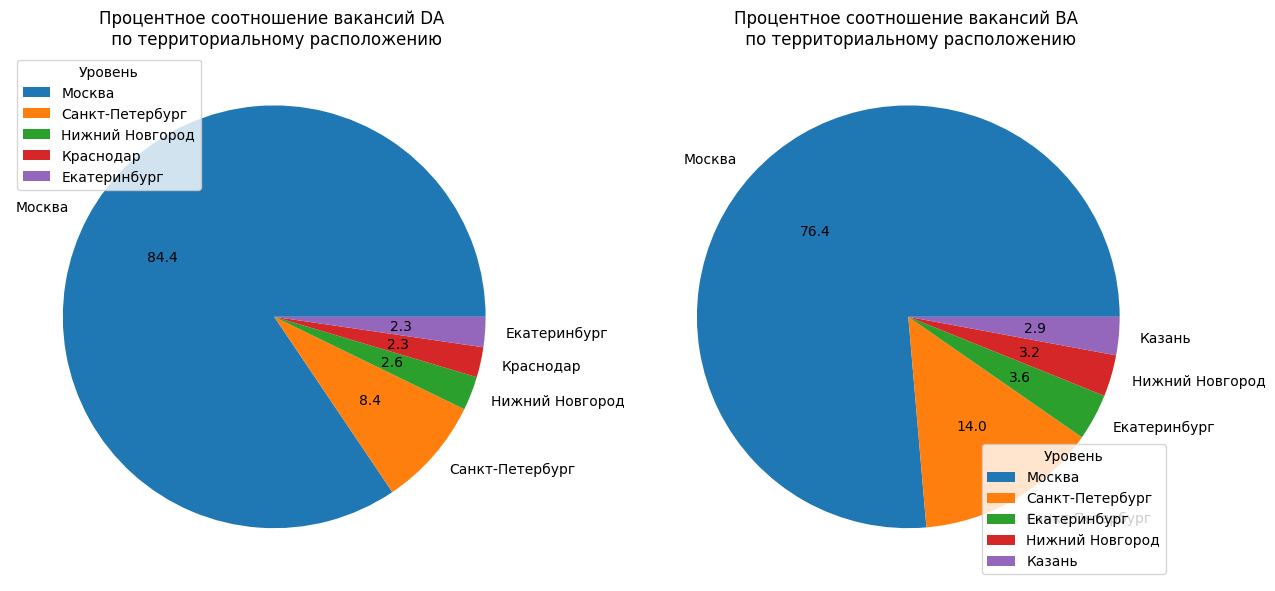

In [75]:
plt.figure(figsize=(15, 15))
ax1=plt.subplot(1, 2, 1)

(
    da
    .value_counts('area')
    .head()
    .plot(
        autopct='%.1f',
        kind='pie',
        title='Процентное соотношение вакансий DA \n по территориальному расположению',
        ax=ax1)
)
plt.legend(title='Уровень')
plt.ylabel('')


ax2=plt.subplot(1, 2, 2)

(
    ba
    .value_counts('area')
    .head()
    .plot(
        autopct='%.1f',
        kind='pie',
        title='Процентное соотношение вакансий BA \n по территориальному расположению',
        ax=ax2)
)
plt.legend(title='Уровень')
plt.ylabel('')
plt.show()

Для обоих направлений чаще всего аналитиков ищут в г. Москва и в г. Санкт-Петербург.

**Определение наиболее желаемых кандидатов на вакансии DA и BA**

Рассмотрим наиболее желаемых кандитов по самым важным soft и hard навыкам в разрезе уровней для DA и BA.

*Топ навыки BA*

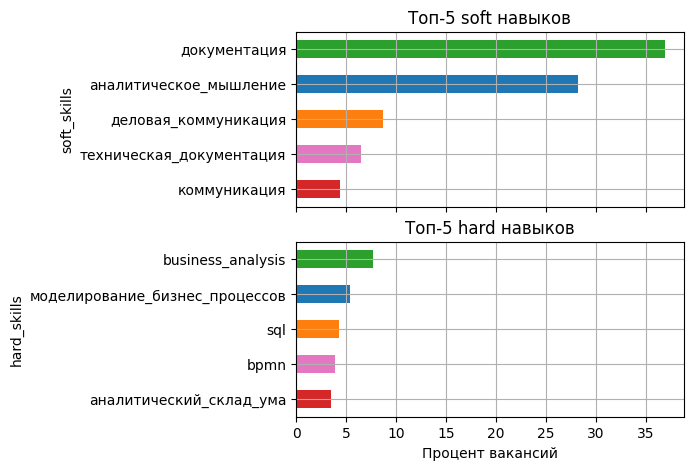

In [76]:
# BA junior
skills_hbars(ba, 'junior')

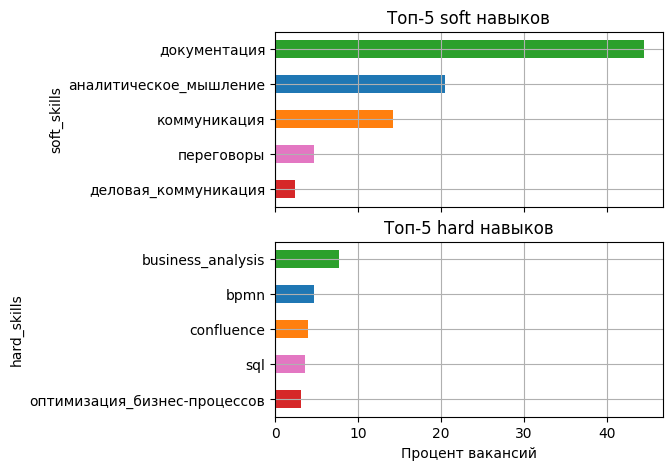

In [77]:
# BA junior+
skills_hbars(ba, 'junior+')

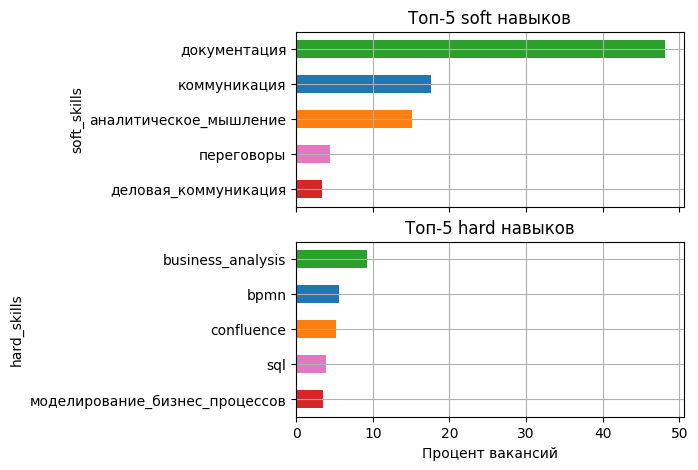

In [78]:
# BA middle
skills_hbars(ba, 'middle')

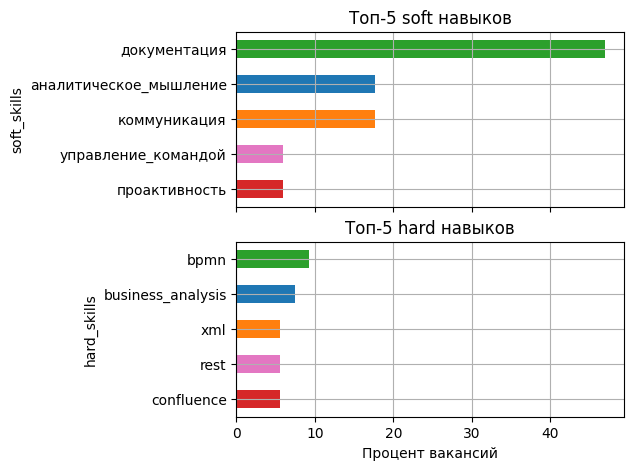

In [79]:
# BA senior
skills_hbars(ba, 'senior')

Требования к soft навыкам специалистов BA почти одинаковы на всех уровнях, в основном это: документация, аналитическое мышление и коммуникация. Лишь у senior специалистов помимо этого еще требуется навык управления командой.

По hard навыкам: у junior ценятся - бизнес анализ, моделирование бизнес процессов, sql; у junior+ и middle - бизнес анализ, bpmn, confluence; у senior - преобладают требования по bpmn и бизнес анализу.  

*Топ навыки DA*

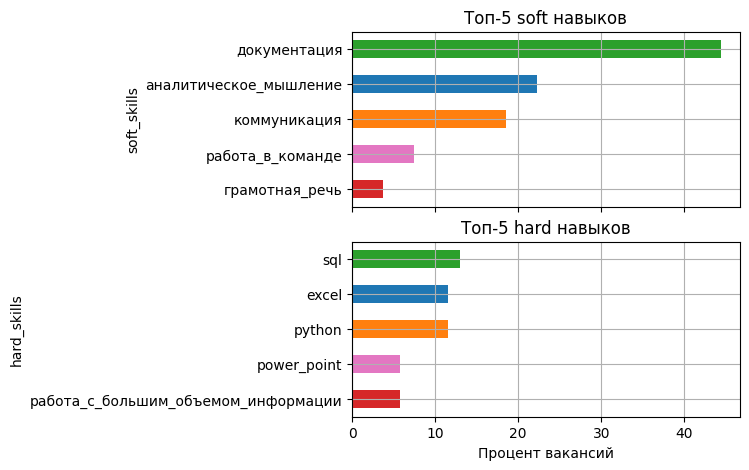

In [80]:
# DA junior
skills_hbars(da, 'junior')

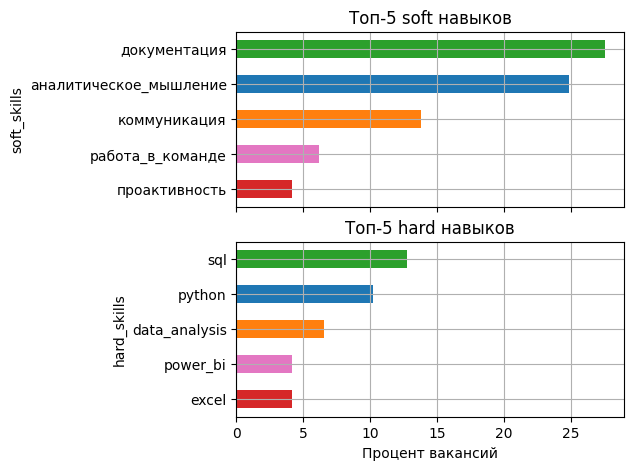

In [81]:
# DA junior+
skills_hbars(da, 'junior+')

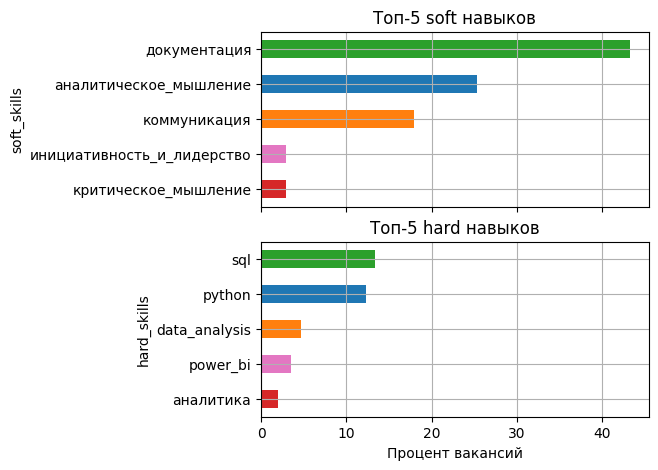

In [82]:
# DA middle
skills_hbars(da, 'middle')

DA senior представлена всего одна вакансия

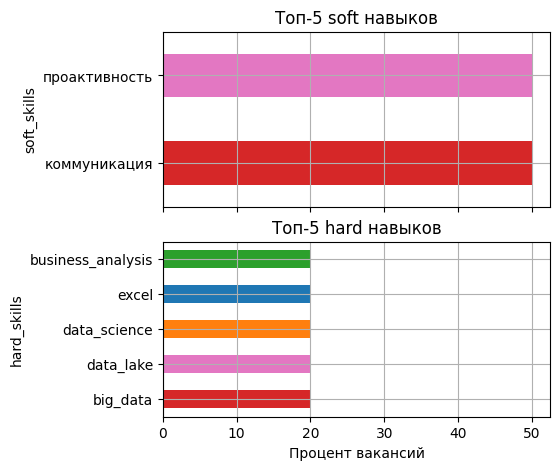

In [83]:
 # DA senior
skills_hbars(da, 'senior')

Как и у BA направления, самые важные для DA soft навыки на всех уровнях тоже примерно одинаковы, на всех этапах потребуется аналитическое мышление, коммуникация, документация. На позициях junior ищут более проактивных людей.

hard навыки: у junior - sql, excel, python; junior+ и middle - sql, python, data анализ.

**Определение типичного места работы**

Определим типичное место работы для DA и BA отдельно для каждого уровня по следующим параметрам: топ работодателей, зарплата, тип занятости, график работы.
Ранее мы уже отмечали, что в большинстве случаев работодателям требуются специалисты на полный день, поэтому в параметре "график работы" в основном будем рассматривать удаленную работу.

*Общая функция для вывода графиков*

Сначала подготовим функцию, которая будет выводить 4 графика (по одному на каждый изучаемый параметр) для выбранного уровня специалиста и направления в аналитике.

In [84]:
def barplots(name, df, exp):
    print('')
    print('                                       Типичное место работы для', name, 'специалиста уровня', exp)
    print('')

    plt.figure(figsize=(15, 15))
    bar_colors = ['tab:green', 'tab:blue', 'tab:orange' , 'tab:pink', 'tab:red']

    ax1 = plt.subplot(2, 2, 1)
    ((df.loc[(df['experience']==exp), 'salary_bin']
      .value_counts(normalize=True)*100)
     .plot(kind='bar',
           rot=45,
           grid=True,
           color=bar_colors,
           ax=ax1)
    )
    plt.title('Зарплатная вилка')
    plt.ylabel('Процент вакансий')

    ax2 = plt.subplot(2, 2, 3)
    ((df.loc[(df['experience']==exp), 'employer']
     .value_counts(normalize=True)*100)
    .head()
    .plot(kind='bar',
          rot=45,
          grid=True,
          color=bar_colors,
          ax=ax2)
    )
    plt.title('Топ-5 работодателей')
    plt.ylabel('Процент вакансий')

    ax3 = plt.subplot(2, 2, 2)
    ((df.loc[(df['experience']==exp), 'employment']
      .value_counts(normalize=True)*100)
     .plot(kind='bar',
           rot=45,
           grid=True,
           color=bar_colors,
           ax=ax3)
    )
    plt.title('Тип занятости')
    plt.ylabel('Процент вакансий')

    ax4 = plt.subplot(2, 2, 4)
    ((df.loc[(df['experience']==exp), 'schedule']
      .value_counts(normalize=True)*100)
     .plot(kind='bar',
           rot=45,
           grid=True,
           color=bar_colors,
           ax=ax4)
    )
    plt.title('График работы')
    plt.ylabel('Процент вакансий')

    plt.subplots_adjust(wspace=.15, hspace=.35)
    plt.show()

    print(50*'*')
    print('Таблица топ-5 работодателей по количеству вакансий')
    display(pd.DataFrame(df.loc[(df['experience']==exp), 'employer'].value_counts().head()))

*Вакансии BA*


                                       Типичное место работы для BA специалиста уровня junior



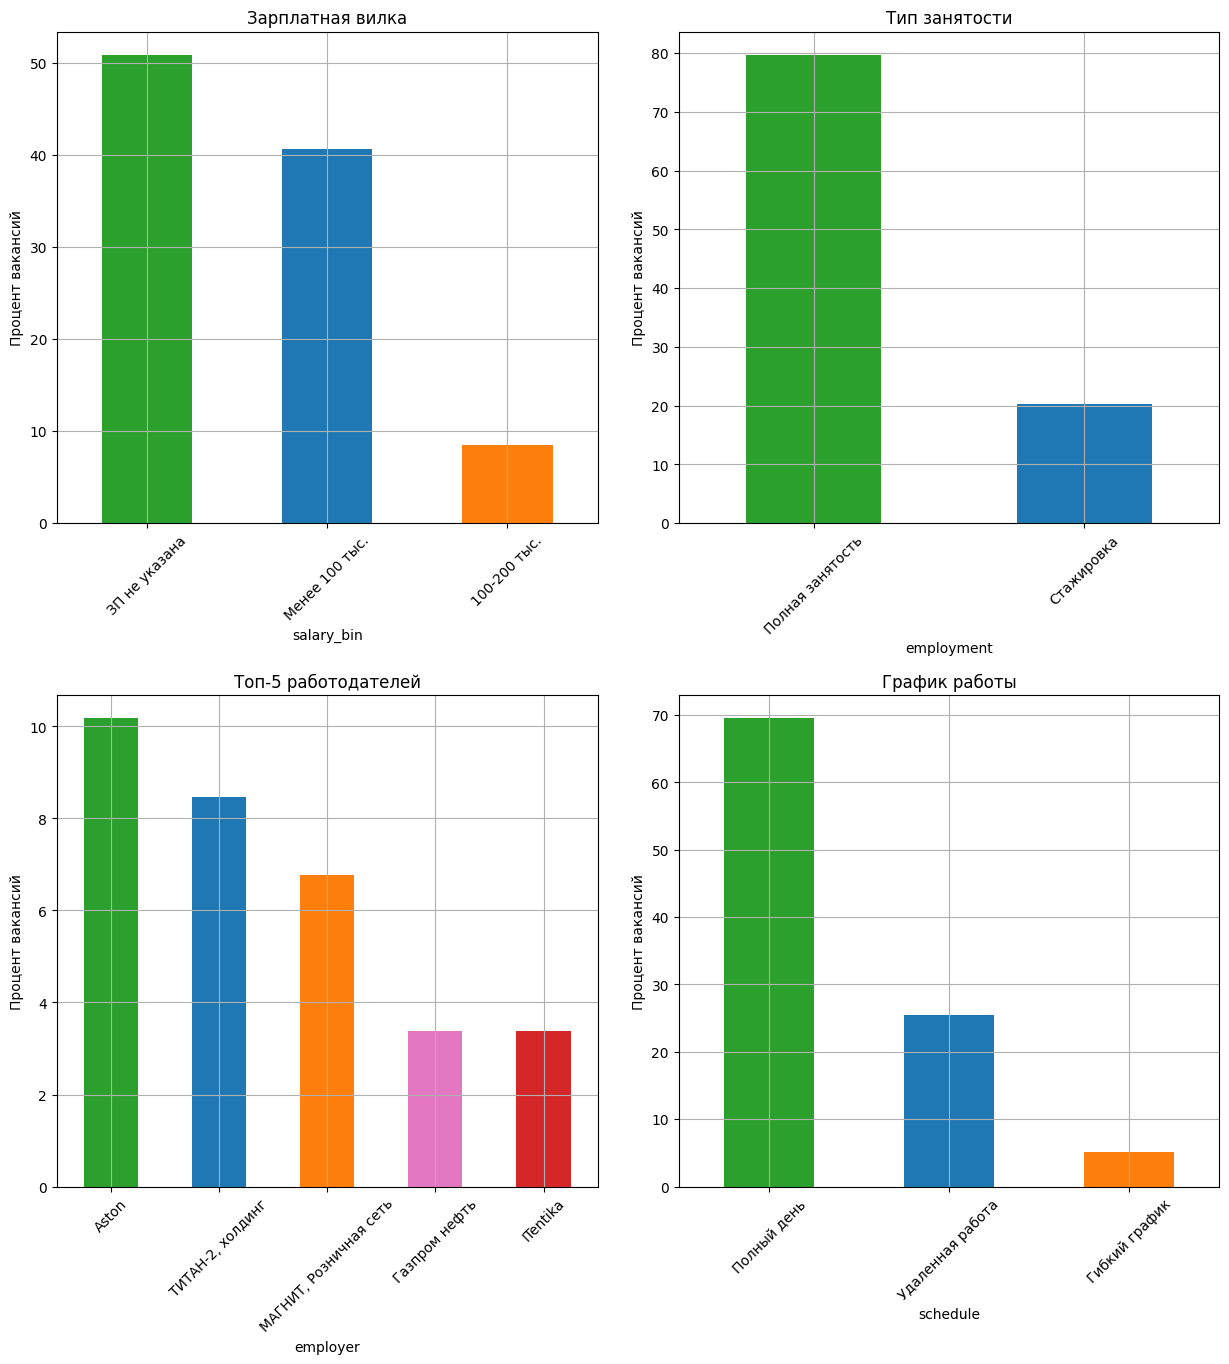

**************************************************
Таблица топ-5 работодателей по количеству вакансий


,count
employer,
Aston,6
"ТИТАН-2, холдинг",5
"МАГНИТ, Розничная сеть",4
Газпром нефть,2
ITentika,2


In [85]:
# BA  junior
barplots('BA', ba, 'junior')

Зарплатная вилка: Почти 40% вакансий предлагают ЗП до 100 тыс. руб. (учитывая, что в более 50% вакансий ЗП не указана) и лишь около 10% от 100 до 200 тыс. руб.

Топ работодателей: больше всего junior специалисты требуются в компании Aston (около 10% вакансий), а также в холдинге Титан-2  (около 8% вакансий).

Тип занятости: наиболее предпочтительным типом занятости (80%) будет полная, всего 20% вакансий предлагают стажировку.

График работы: 70% работодателей предлагают полный день; 25% - удаленная работа; работа по гибкому графику всего 5 %.


                                       Типичное место работы для BA специалиста уровня junior+



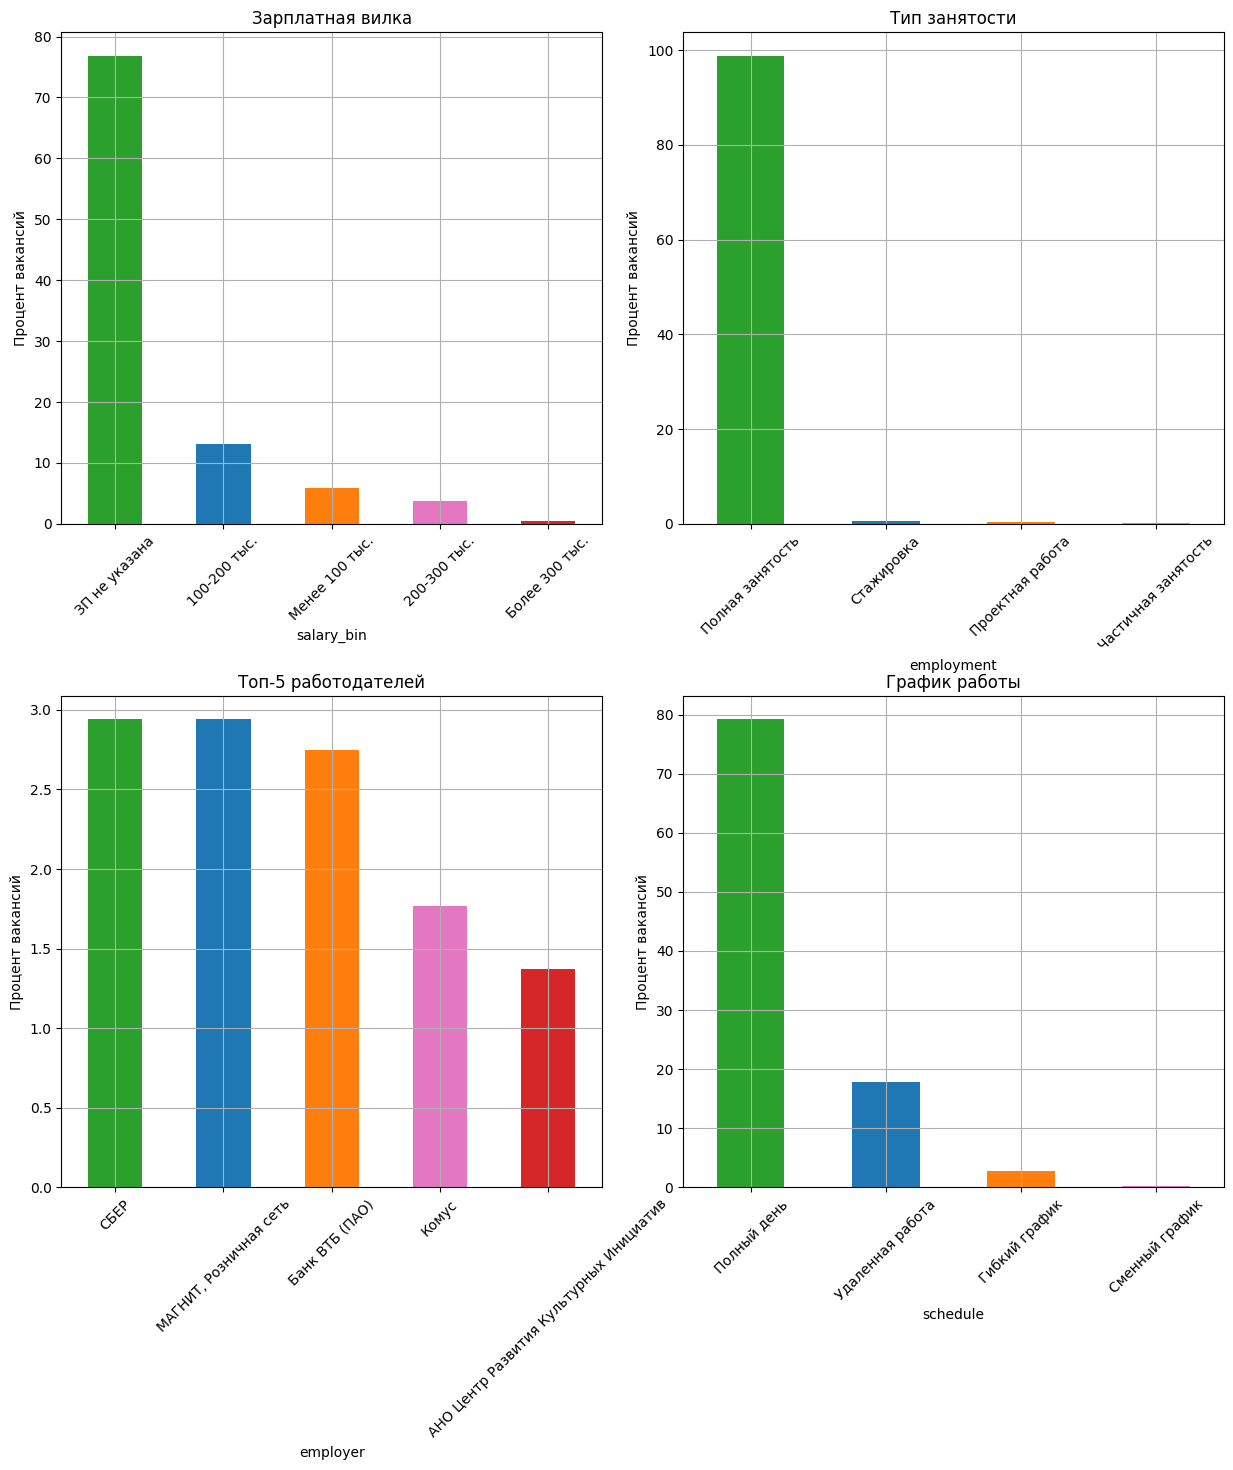

**************************************************
Таблица топ-5 работодателей по количеству вакансий


,count
employer,
СБЕР,15
"МАГНИТ, Розничная сеть",15
Банк ВТБ (ПАО),14
Комус,9
АНО Центр Развития Культурных Инициатив,7


In [86]:
# BA junior+
barplots('BA', ba, 'junior+')

Зарплатная вилка: здесь уже в 75% вакансий ЗП не указана. В основном ЗП этой категории специалистов составляет 100-200 тыс. руб.(12%), менее 100 тыс. руб. (6%), 200-300 тыс.руб.(3%).

Топ работодателей. Больше всего вакансий для специалистов данного уровня предлагают: СБЕР, МАГНИТ, банк ВТБ, Комус, Центр Развития Культурных Инициатив.

Тип занятости: почти 100% вакансий на полную занятость.

График работы: вакансии на полный день (80%), удаленная работа (18%), гибкий график (2%).


                                       Типичное место работы для BA специалиста уровня middle



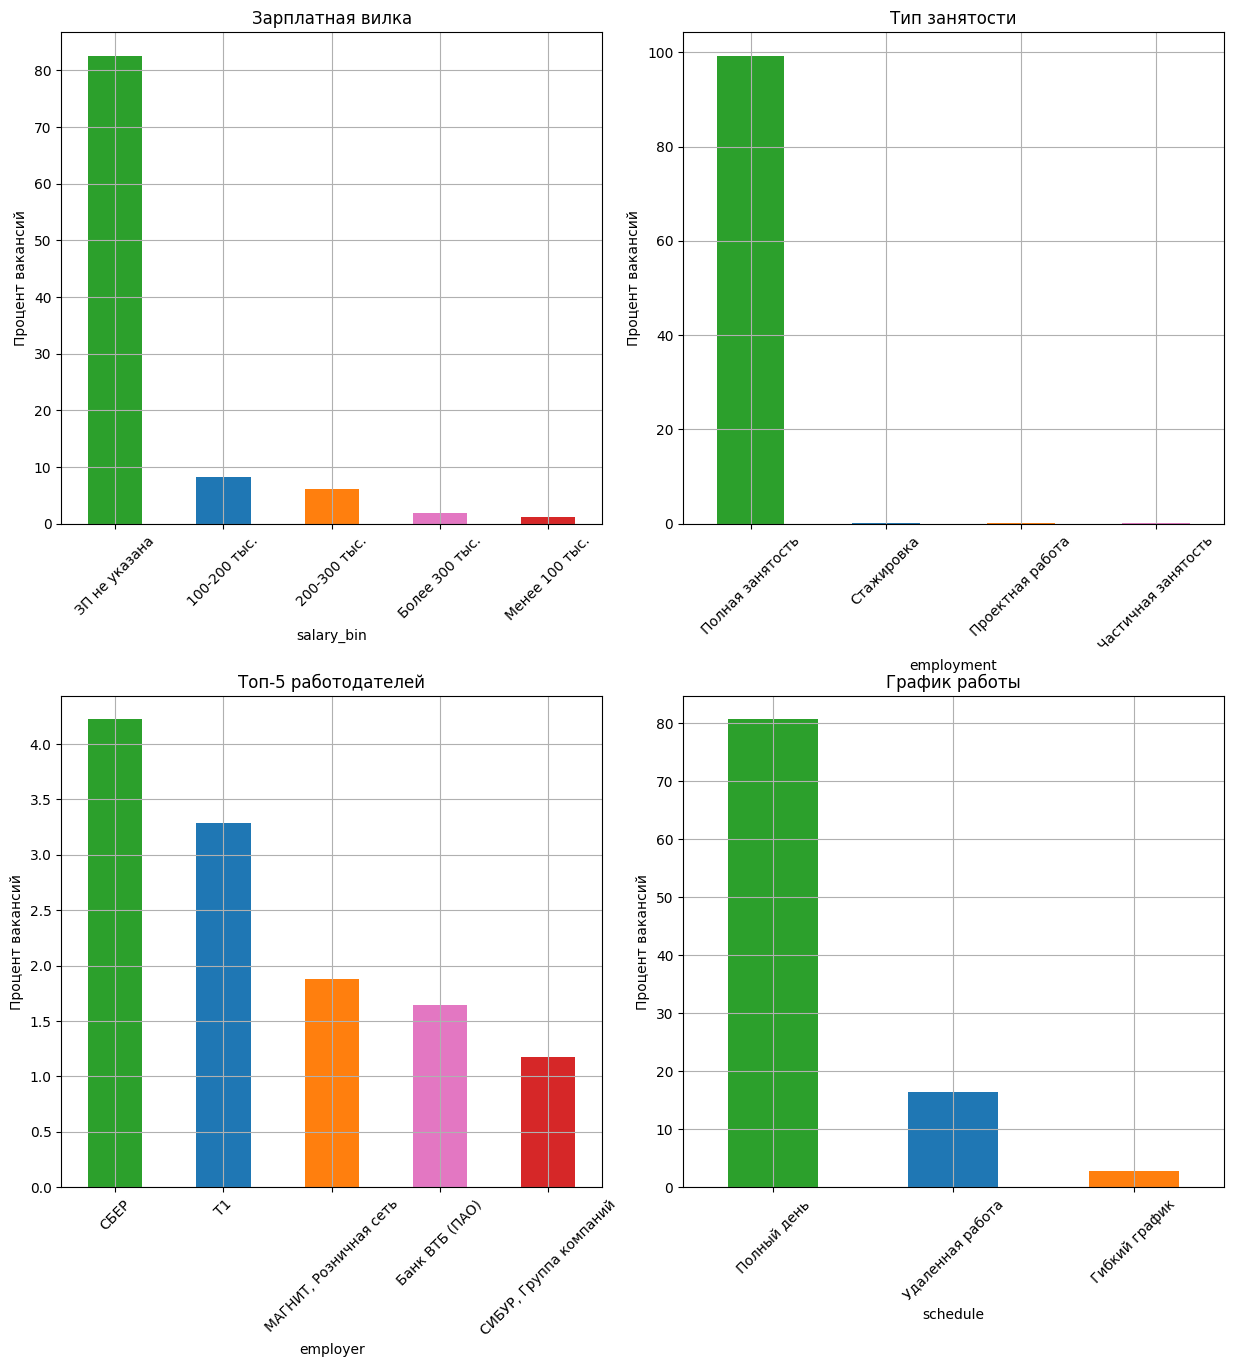

**************************************************
Таблица топ-5 работодателей по количеству вакансий


,count
employer,
СБЕР,18
Т1,14
"МАГНИТ, Розничная сеть",8
Банк ВТБ (ПАО),7
"СИБУР, Группа компаний",5


In [87]:
# BA middle
barplots('BA', ba, 'middle')

Зарплатная вилка: 82% вакансий ЗП не указана,с 9% с ЗП в 100-200 тыс. руб., 6% вакансии с 200-300 тыс. руб.

Топ работодателей: СБЕР, Т1, Магнит, банк ВТБ, группа компаний Сибур.

Тип занятости: без изменений, почти 100% - полная занятость.

График работы: полный день - 80%, удаленная работа - 17%, 3% - гибкий график


                                       Типичное место работы для BA специалиста уровня senior



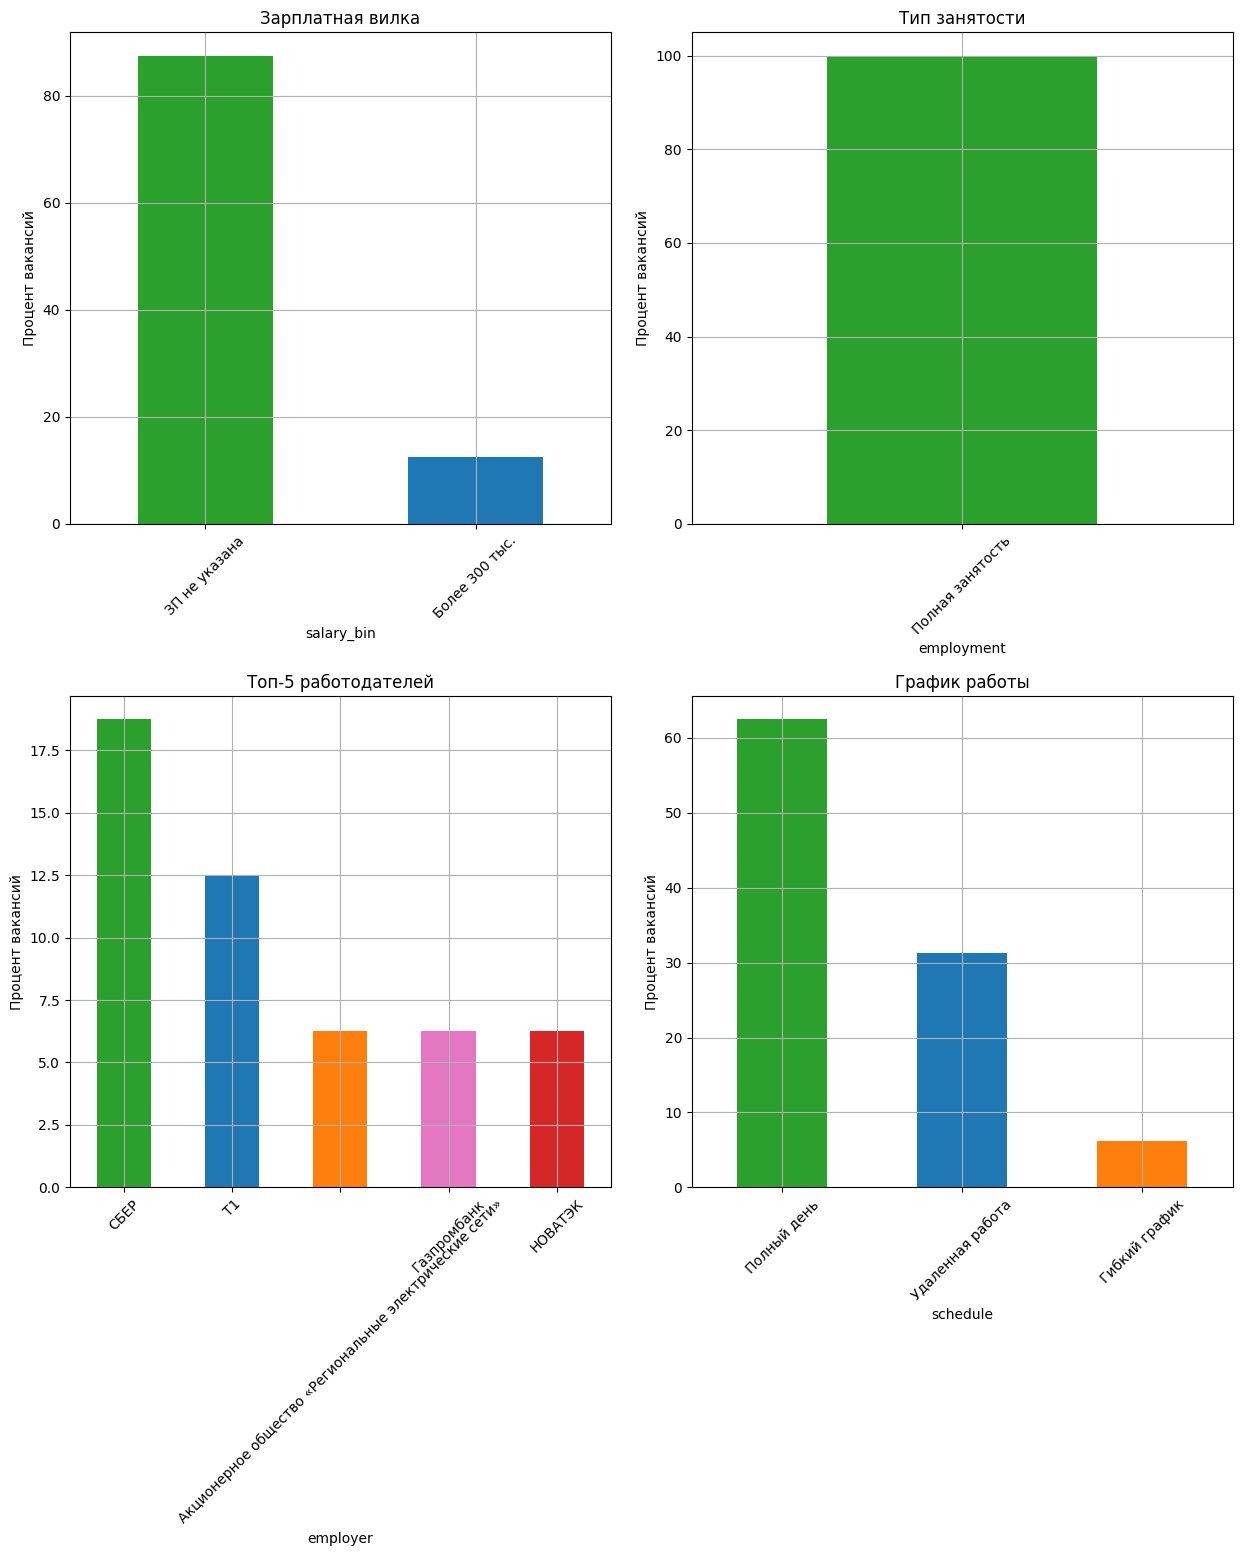

**************************************************
Таблица топ-5 работодателей по количеству вакансий


,count
employer,
СБЕР,3
Т1,2
Акционерное общество «Региональные электрические сети»,1
Газпромбанк,1
НОВАТЭК,1


In [88]:
# BA senior
barplots('BA', ba, 'senior')

Зарплатная вилка: 83% вакансий без указания ЗП, около 17% з.п. от 300 тыс. руб.

Топ работодателей: СБЕР, Т1, Газпромбанк, Региональные электрические сети, НОВАТЭК.

Тип занятости: остались вакансии исключительно с полной занятостью.

График работы: 62% вакансий с полным рабочем днем, удаленная работа 31%, 7% с гибким графиком.

*Вакансии DA*


                                       Типичное место работы для DA специалиста уровня junior



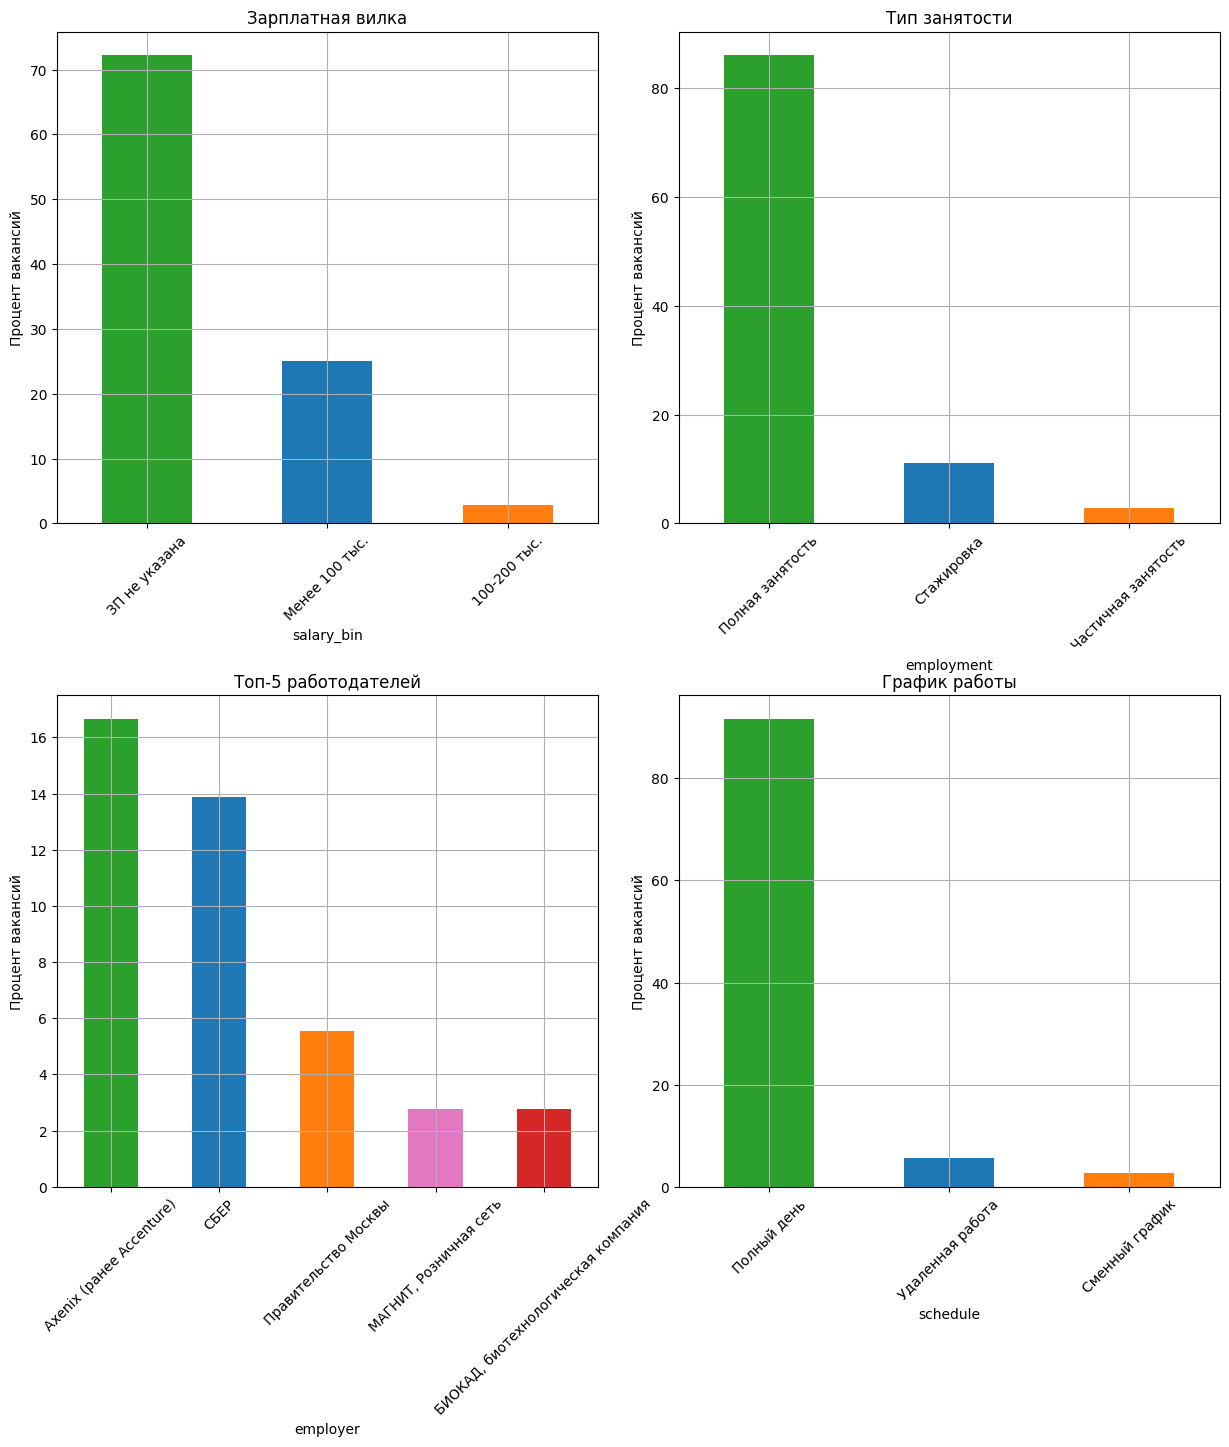

**************************************************
Таблица топ-5 работодателей по количеству вакансий


,count
employer,
Axenix (ранее Accenture),6
СБЕР,5
Правительство Москвы,2
"МАГНИТ, Розничная сеть",1
"БИОКАД, биотехнологическая компания",1


In [89]:
# junior DA
barplots('DA', da, 'junior')

Зарплатная вилка: около 71% вакансий без указания ЗП. В основном junior специалисту предлагается ЗП до 100 тыс. руб. (почти 25% вакансий).

Топ работодателей: Axenix, СБЕР, Правительство Москвы, Магнит, Биокад.

Тип занятости: 88% - полный день, 10% стажировка, 2% частичная занятость.

График работы: 92% - полный день, 5% удаленная работа, 3% сменный график


                                       Типичное место работы для DA специалиста уровня junior+



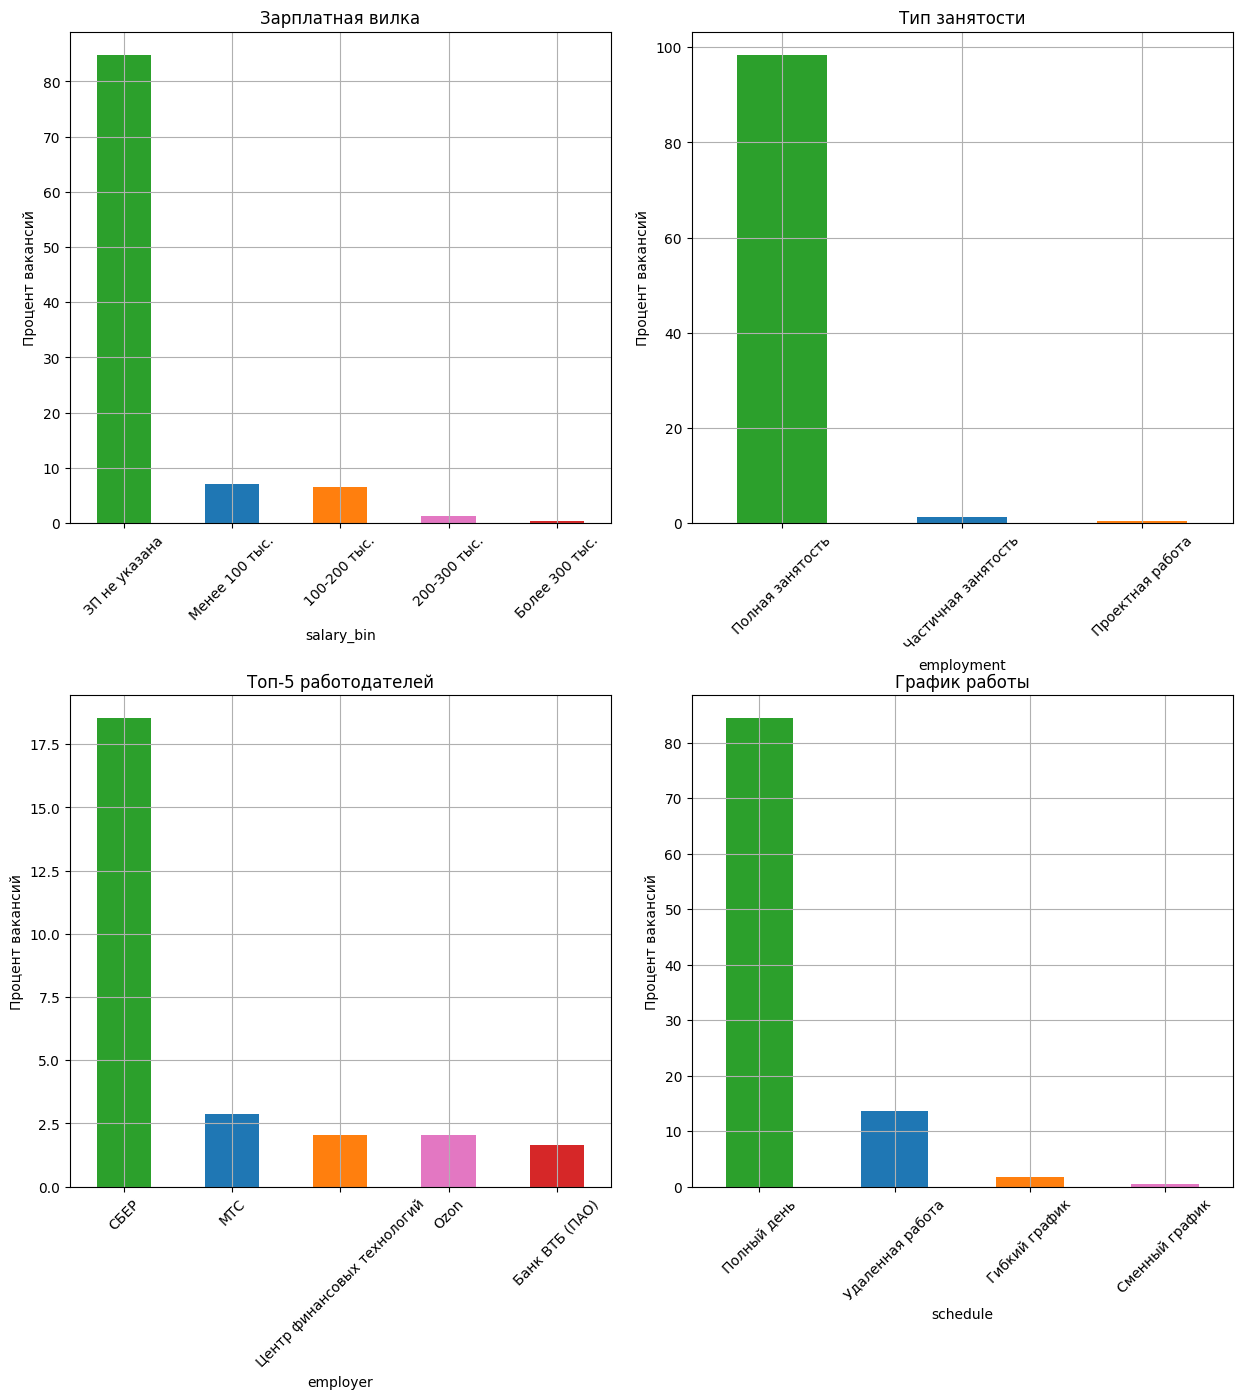

**************************************************
Таблица топ-5 работодателей по количеству вакансий


,count
employer,
СБЕР,45
МТС,7
Центр финансовых технологий,5
Ozon,5
Банк ВТБ (ПАО),4


In [90]:
# junior+ DA
barplots('DA', da, 'junior+')

Зарплатная вилка: в 85% вакансий ЗП не указана, по 8% з.п. менее 100 тыс. и 100-200 тыс.

Топ работодателей: СБЕР, МТС, Центр финансовых технологий, OZON, банк ВТБ.

Тип занятости: почти 100% вакансий на полную занятость.

График работы: 85% - полный день, 13% - удаленная работа, 2% - гибкий график.


                                       Типичное место работы для DA специалиста уровня middle



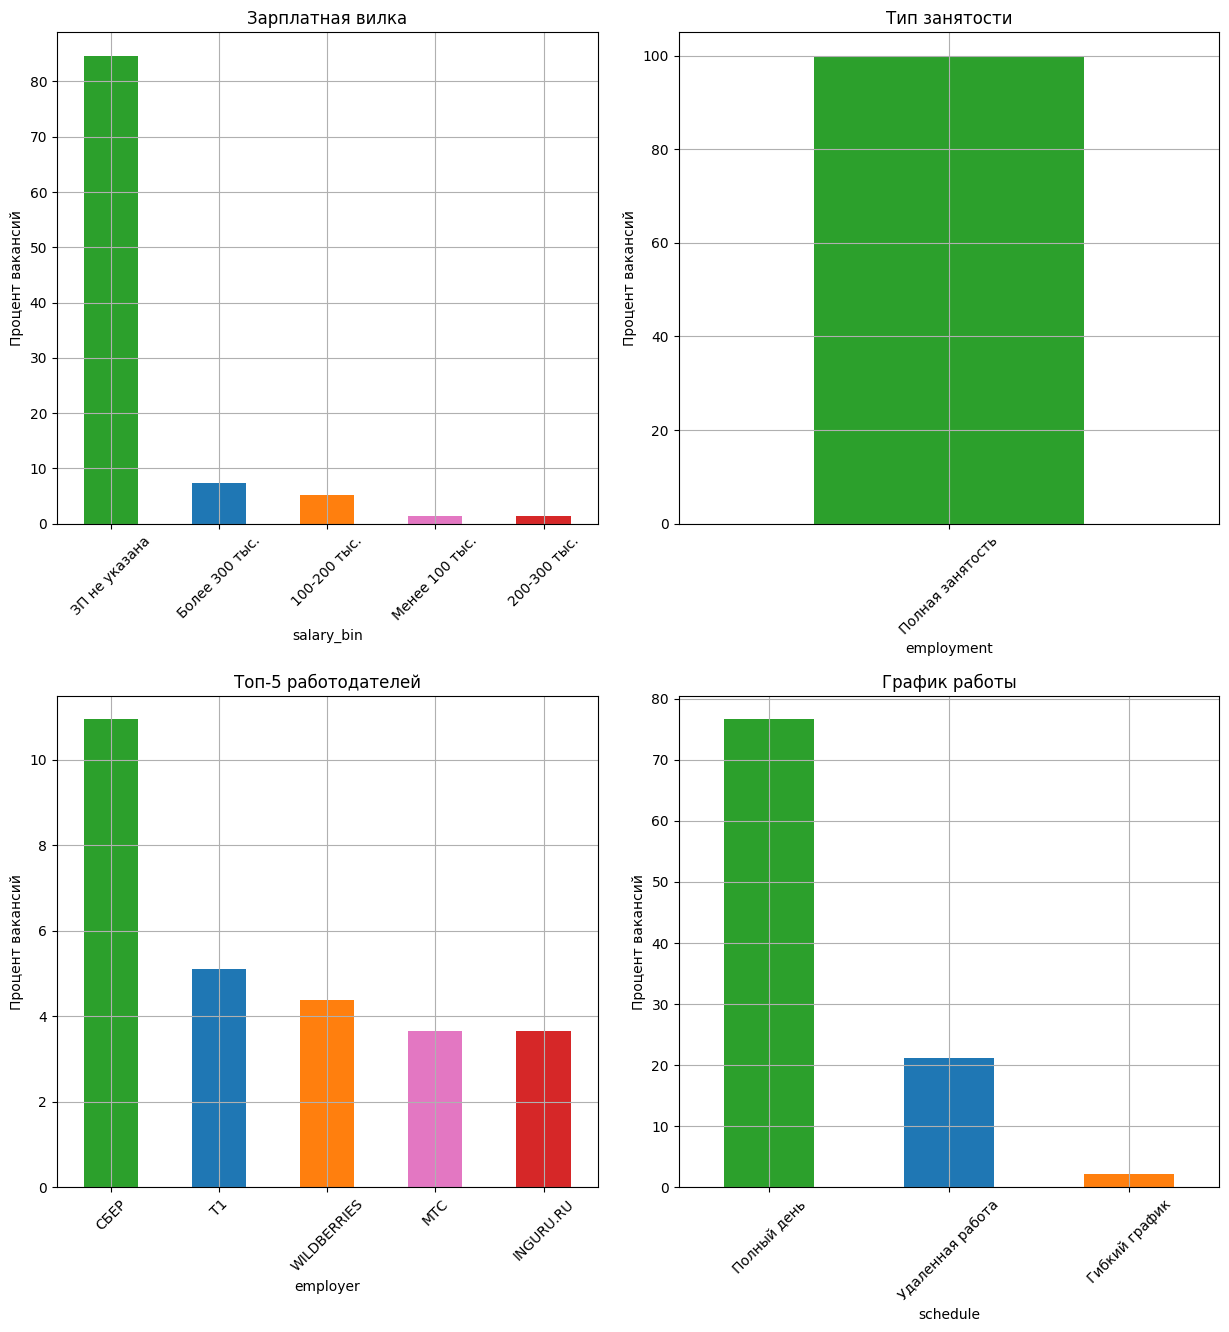

**************************************************
Таблица топ-5 работодателей по количеству вакансий


,count
employer,
СБЕР,15
Т1,7
WILDBERRIES,6
МТС,5
INGURU.RU,5


In [91]:
# DA middle
barplots('DA', da, 'middle')

Зарплатная вилка: 85% вакансий з.п. не указана, более 300 тыс. - 8%, 5% - 100-200 тыс.

Топ работодателей: СБЕР, Т1, WILDBERRIES, МТС, INGURU.RU

Тип занятости: Без изменений, почти 100% - полная занятость.

График работы: 77% полный день, 21% - удаленная работа, 2% - гибкий график.

Позицию senior в DA рассматривать не будем, т.к. там всего лишь одна вакансия

## Общий вывод

Выборка составила 417 вакансий для DA и 1011 для BA.

Больше всего вакансий для обоих направлений предлагается в СБЕРе.

Наибольшее количество вакансий для DA (84,4%) и BA (76,4%) предложено в Москве.

По опыту работы самыми востребованными специалистами являются junior+ (1-3 года опыта) и middle (3-6 лет опыта):
58,3% и 32,9% вакансий для DA,
50,4% и 42,1% для BA.
Junior (без опыта) специалисты оказались более востребованы в DA, чем в BA (8,6% вакансий против 5,8%).

Практически во всех вакансиях обеих специальностей предпочтительным графиком работы является полный день, а типом занятости – «полная».

Рост зарплаты напрямую зависит от опыта работы, чем больше опыт, тем выше зарплата.
Заметна тенденция увеличения количества вакансий без указания зарплаты с ростом опыта работы.

Основные soft навыки для DA и BA - это документация, аналитическое мышление и коммуникация. hard навыки у DA и BA совсем разные, единственное совпадение для них - это знание SQL. Для BA наиболее важный фактор - бизнес анализ, а для DA - языки программирования.

Ссылка на презентацию https://disk.yandex.com.am/i/TvKP5z2gdoM3ZA